In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_interpolated.x.describe()

In [ ]:
import os
import pathlib 
dataframes = []
for f in pathlib.Path("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/October_15_2024_22-05/processed_grids").glob("*.h5"):
    dataframes.append(str(f))
dataframes = [pd.read_hdf(f, key="df") for f in dataframes]
df_interpolated = pd.concat(dataframes, axis=0, ignore_index=True)
df_interpolated

In [64]:
df_3d = pd.read_hdf("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/October_15_2024_22-05/3D_data/all_data_routine1.h5", key="df")
df_3d

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
0,0.300000,0.000000,0.000000,0.000000,-2.349142e-01,0.000000e+00,-0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
1,0.300000,0.000000,0.063467,0.000000,-2.349142e-01,0.000000e+00,-0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
2,0.300000,0.000000,0.126933,0.000000,-2.349142e-01,0.000000e+00,-0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
3,0.300000,0.000000,0.190400,0.000000,-2.349142e-01,0.000000e+00,-0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
4,0.300000,0.000000,0.253866,0.000000,-2.349142e-01,0.000000e+00,-0.0,2.453739,36.250454,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.0,0.0,-0.0,0.0,0.000000e+00,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600896,0.000052,1.573296,6.092786,-0.999101,2.903060e-12,6.689876e-13,-0.0,1.000450,1.001799,1.123509e-07,...,1.540942e-10,-5.377990e-12,0.0,0.0,0.0,0.0,-0.0,-6.791101e-08,-3.523558e-07,0.0
64600897,0.000052,1.573296,6.156252,-0.999101,2.903060e-12,6.689876e-13,-0.0,1.000450,1.001799,7.592026e-08,...,6.965242e-11,-5.432903e-12,0.0,0.0,0.0,0.0,-0.0,-4.542650e-08,-3.559535e-07,0.0
64600898,0.000052,1.573296,6.219719,-0.999101,2.903060e-12,6.689876e-13,-0.0,1.000450,1.001799,3.826800e-08,...,1.758975e-11,-5.465939e-12,0.0,0.0,0.0,0.0,-0.0,-2.275907e-08,-3.581180e-07,0.0
64600899,0.000052,1.573296,6.283185,-0.999101,2.903060e-12,6.689876e-13,-0.0,1.000450,1.001799,1.480808e-22,...,-1.982074e-37,-5.476966e-12,0.0,0.0,0.0,0.0,-0.0,-8.789057e-23,-3.588405e-07,0.0


In [ ]:
column_names = [
    "x",
    "z",
    "r",
    "theta",
    "alpha",
    "psi",
    "q",
    "betak",
    "betat",
    "dbetatdr",
    "dbetatdt",
    "He",
    "Hf",
    "Omega",
    "b2",
    "rho",
]
df_2d = pd.read_csv("/data/sjammi6/thesisproject/BlackHoleDiskProject/InitialData/October_15_2024_22-05/2D_data/all_vars.dat", delimiter=r"\s+", header=None, names=column_names)
df_2d

In [ ]:
df_2d["phi"] = np.float64(0.0)
df_2d["y"] = np.float64(0.0)
df_2d["gxx"] = (df_2d.psi**4 * np.exp(2 * df_2d.q)) * (
    ((df_2d.x / df_2d.r) ** 2) + ((df_2d.z * np.cos(df_2d.phi) / df_2d.r) ** 2)
) + np.sin(df_2d.phi) ** 2 * df_2d.psi**4
df_2d["gxy"] = (
    df_2d.psi**4
    * np.exp(2 * df_2d.q)
    * (df_2d.x * df_2d.y / df_2d.r**2 + df_2d.z**2 * np.cos(df_2d.phi) * np.sin(df_2d.phi) / df_2d.r**2)
    - np.sin(df_2d.phi) * np.cos(df_2d.phi) * df_2d.psi**4
)
df_2d["gxz"] = (
    df_2d.psi**4
    * np.exp(2 * df_2d.q)
    * (
        df_2d.x * df_2d.z / df_2d.r**2
        - df_2d.z * np.cos(df_2d.phi) * np.sqrt(df_2d.x**2 + df_2d.y**2) / df_2d.r**2
    )
)
df_2d["gyy"] = (
    df_2d.psi**4
    * np.exp(2 * df_2d.q)
    * (df_2d.y**2 / df_2d.r**2 + df_2d.z**2 * np.sin(df_2d.phi) ** 2 / df_2d.r**2)
    + np.cos(df_2d.phi) ** 2 * df_2d.psi**4
)
df_2d["gyz"] = (
    df_2d.psi**4
    * np.exp(2 * df_2d.q)
    * (
        df_2d.y * df_2d.z / df_2d.r**2
        - df_2d.z * np.sin(df_2d.phi) * np.sqrt(df_2d.x**2 + df_2d.y**2) / df_2d.r**2
    )
)
df_2d["gzz"] = (
    df_2d.psi**4 * np.exp(2 * df_2d.q) * (df_2d.x**2 + df_2d.y**2) / df_2d.r**2
    + df_2d.psi**4 * np.exp(2 * df_2d.q) * df_2d.z**2 / df_2d.r**2
)
df_2d_new_xplane = df_2d[((df_2d.theta == dict(df_2d.theta.describe())["max"])) & (df_2d.phi == np.float64(0))]
df_2d_new_xplane

In [ ]:
df_3d_xplane = df_3d[(df_3d.theta == dict(df_3d.theta.describe())["50%"]) & (df_3d.phi == dict(df_3d.phi.describe())["min"])]
df_3d_xplane = df_3d_xplane.sort_values(by="r").drop_duplicates()
df_3d_xplane.sort_values(by="r")
df_3d_xplane

In [10]:
df_interpolated_xplane = df_interpolated[
    (df_interpolated.y >= np.float64(-0.0001)) & 
    (df_interpolated.y <= np.float64(0.0001)) & 
    (df_interpolated.z >= np.float64(-0.0001)) & 
    (df_interpolated.z <= np.float64(0.0001))
]

df_interpolated_xplane = df_interpolated_xplane.sort_values(['x', 'y', 'z'])

In [ ]:
list(df_3d.columns)[3:]

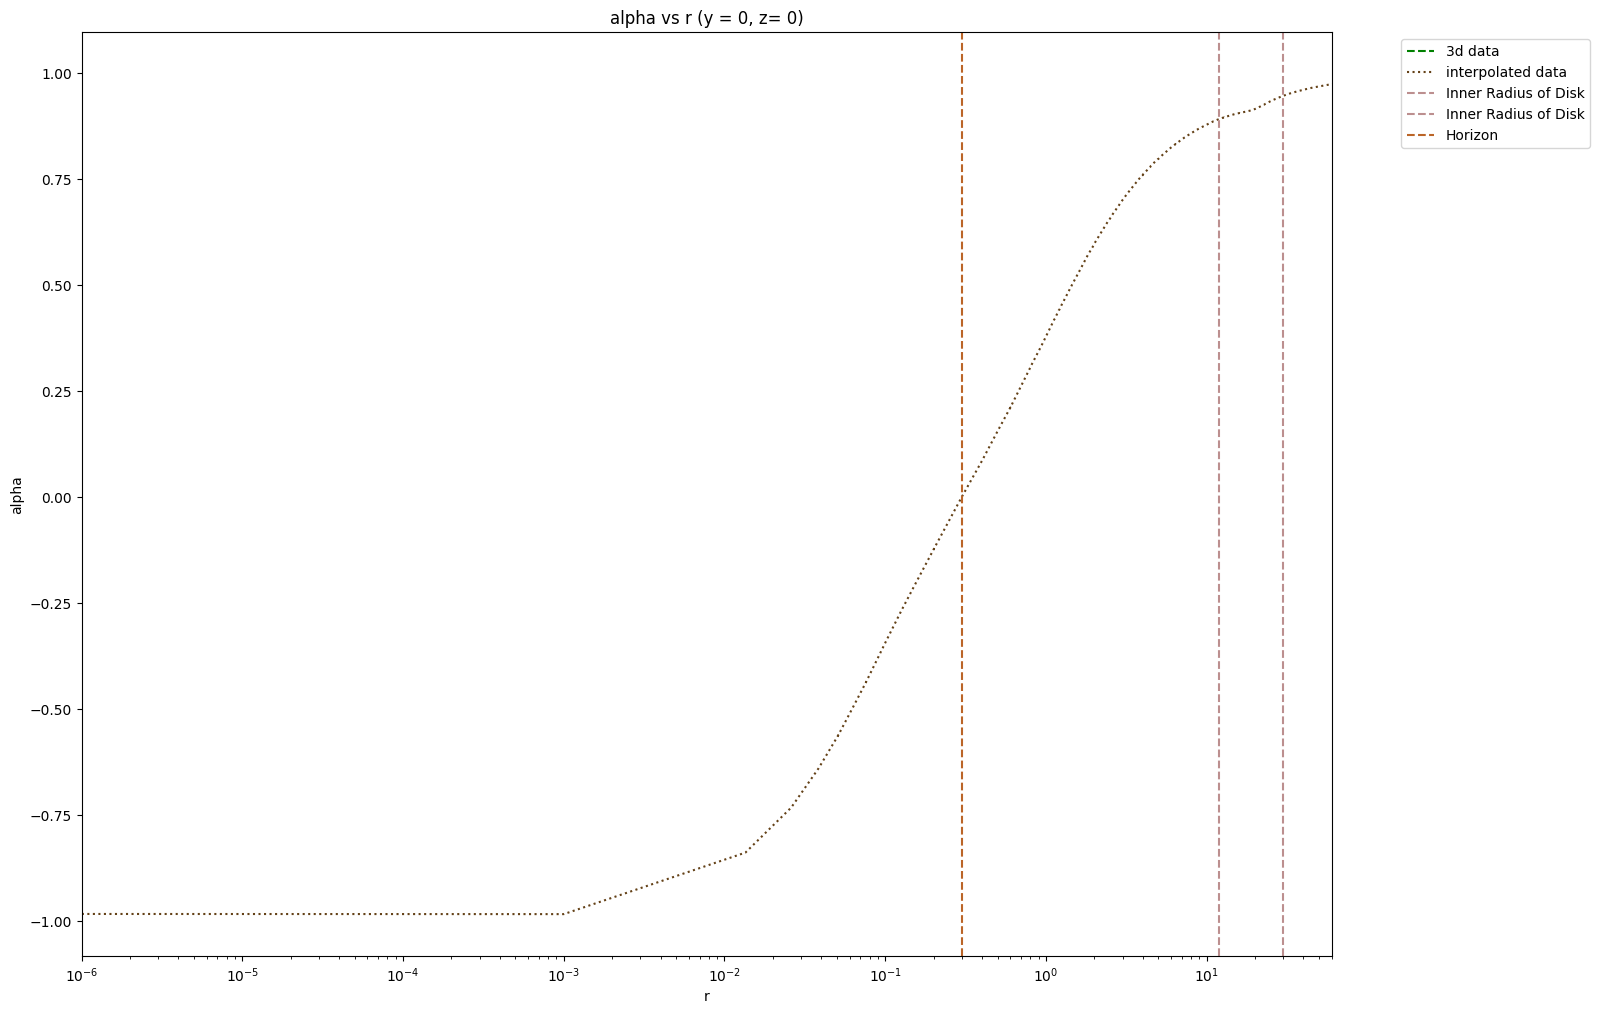

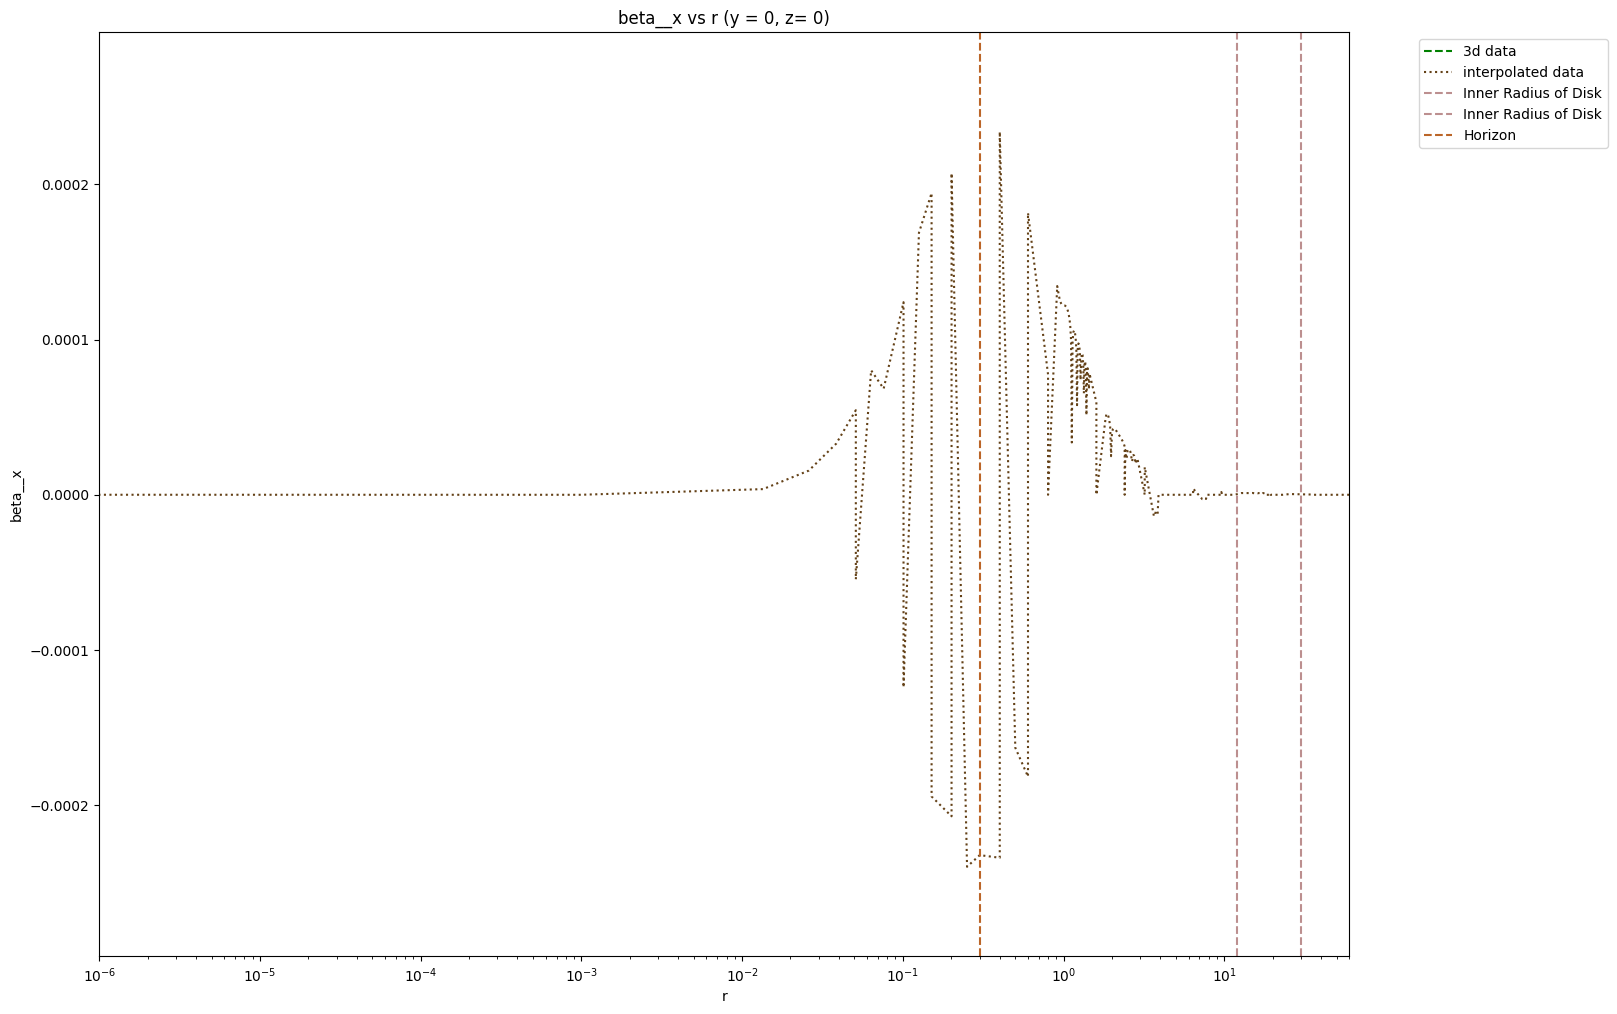

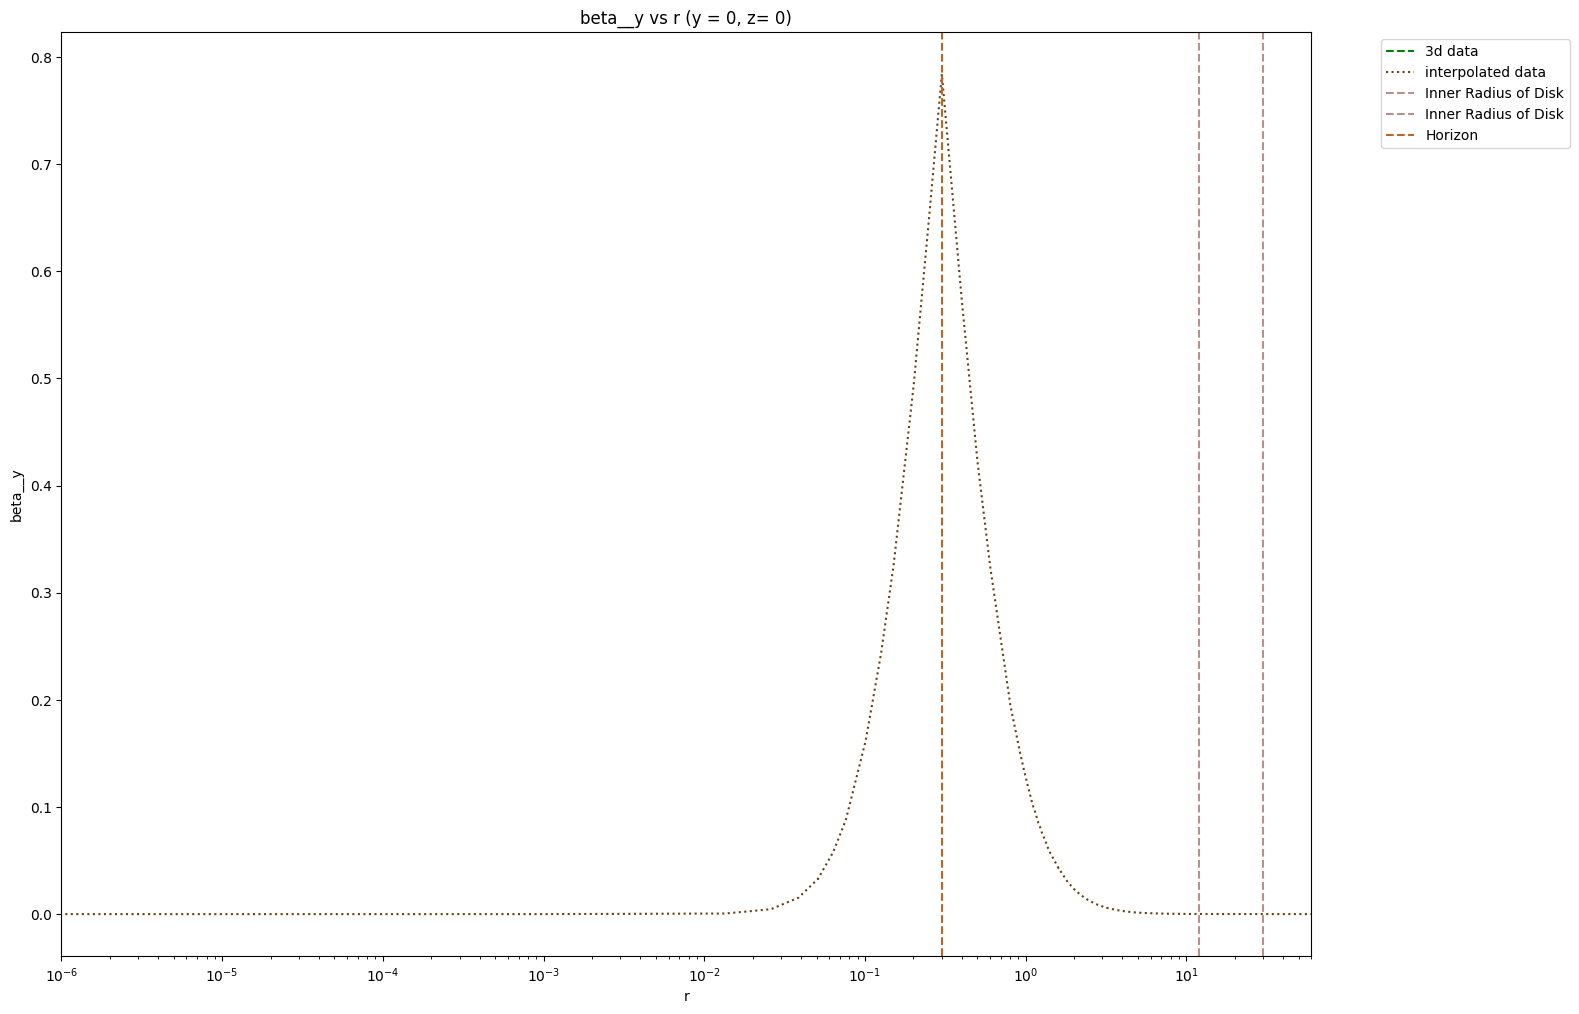

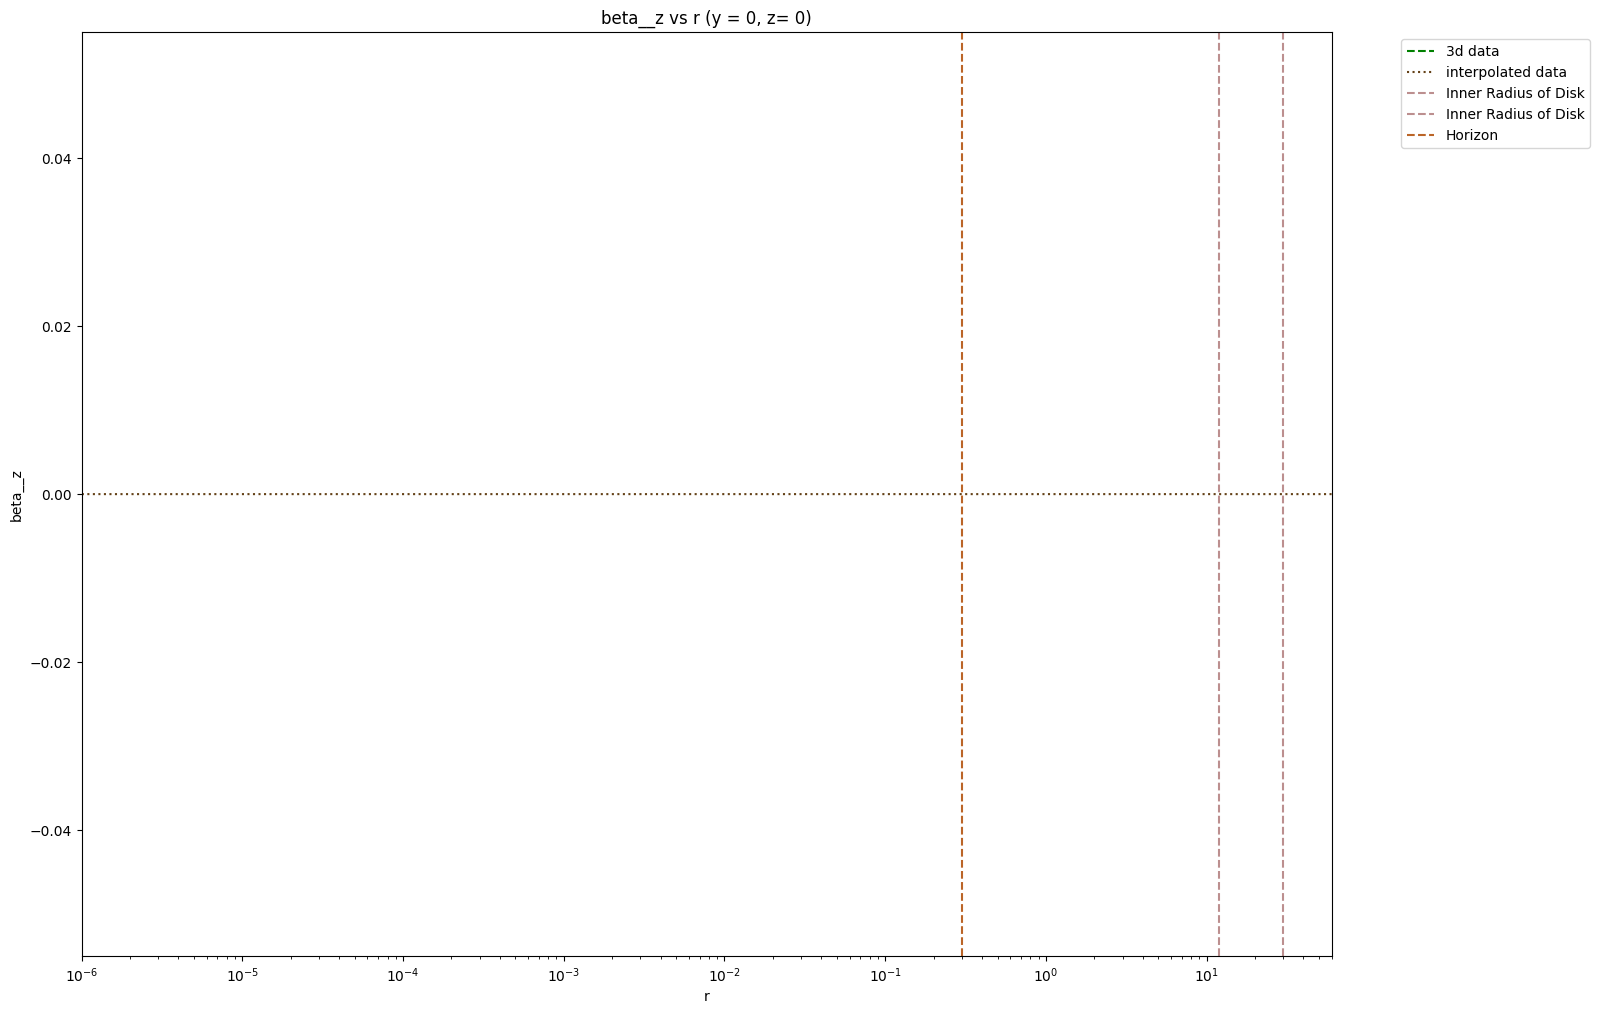

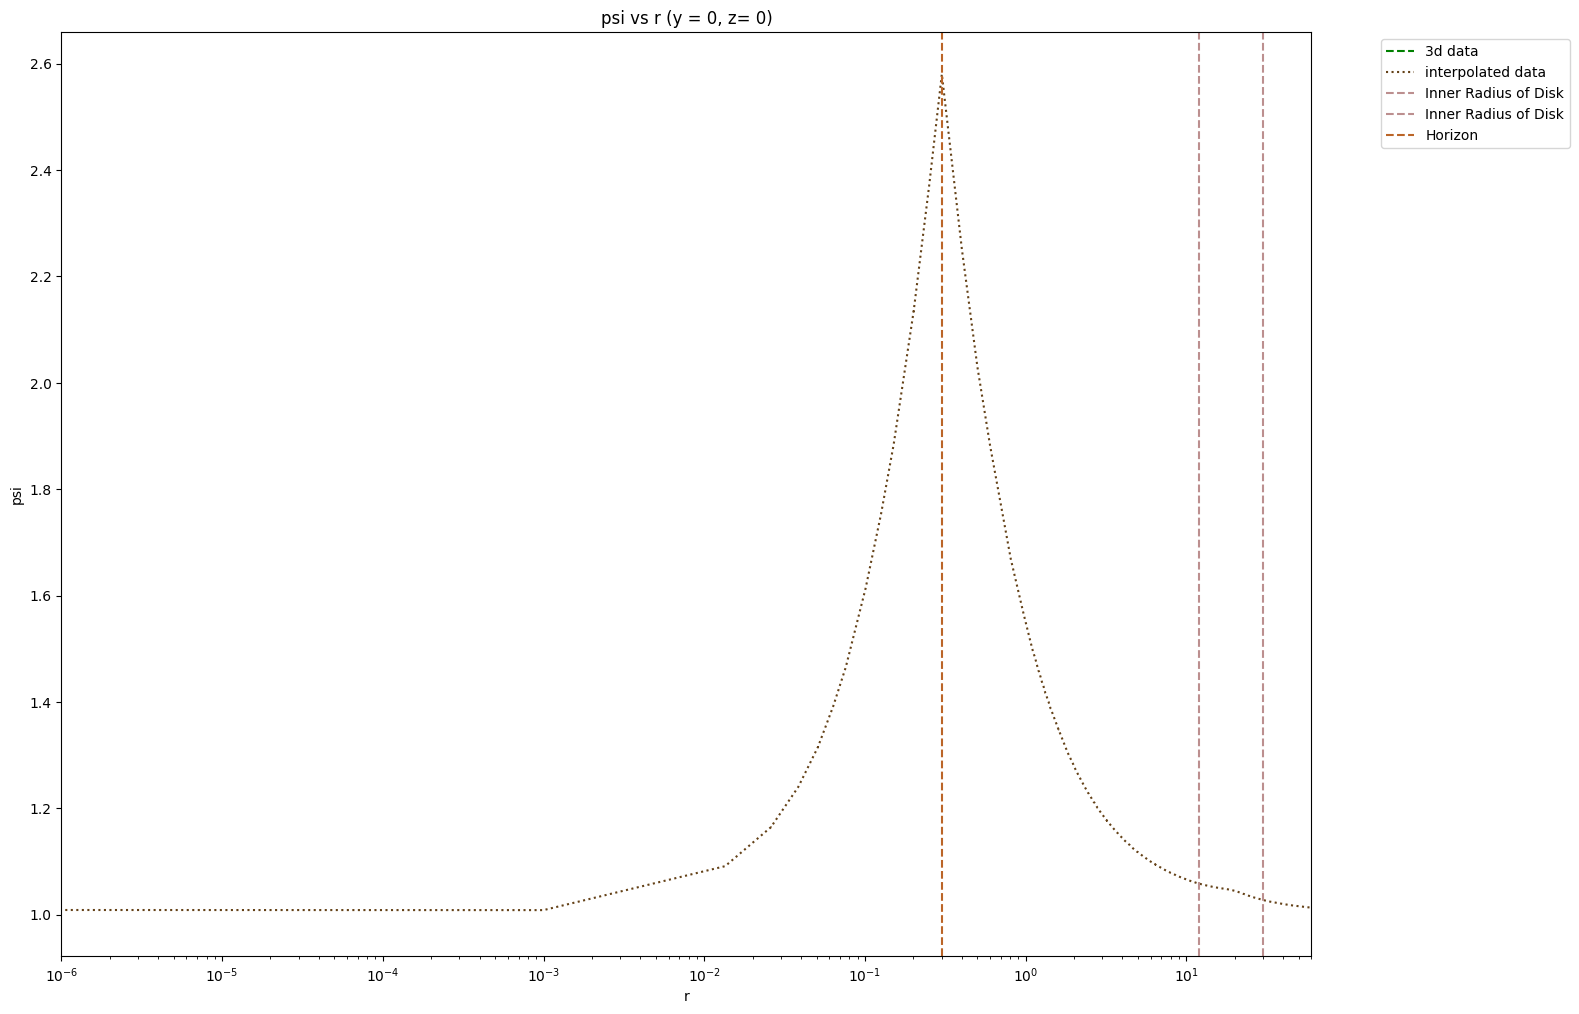

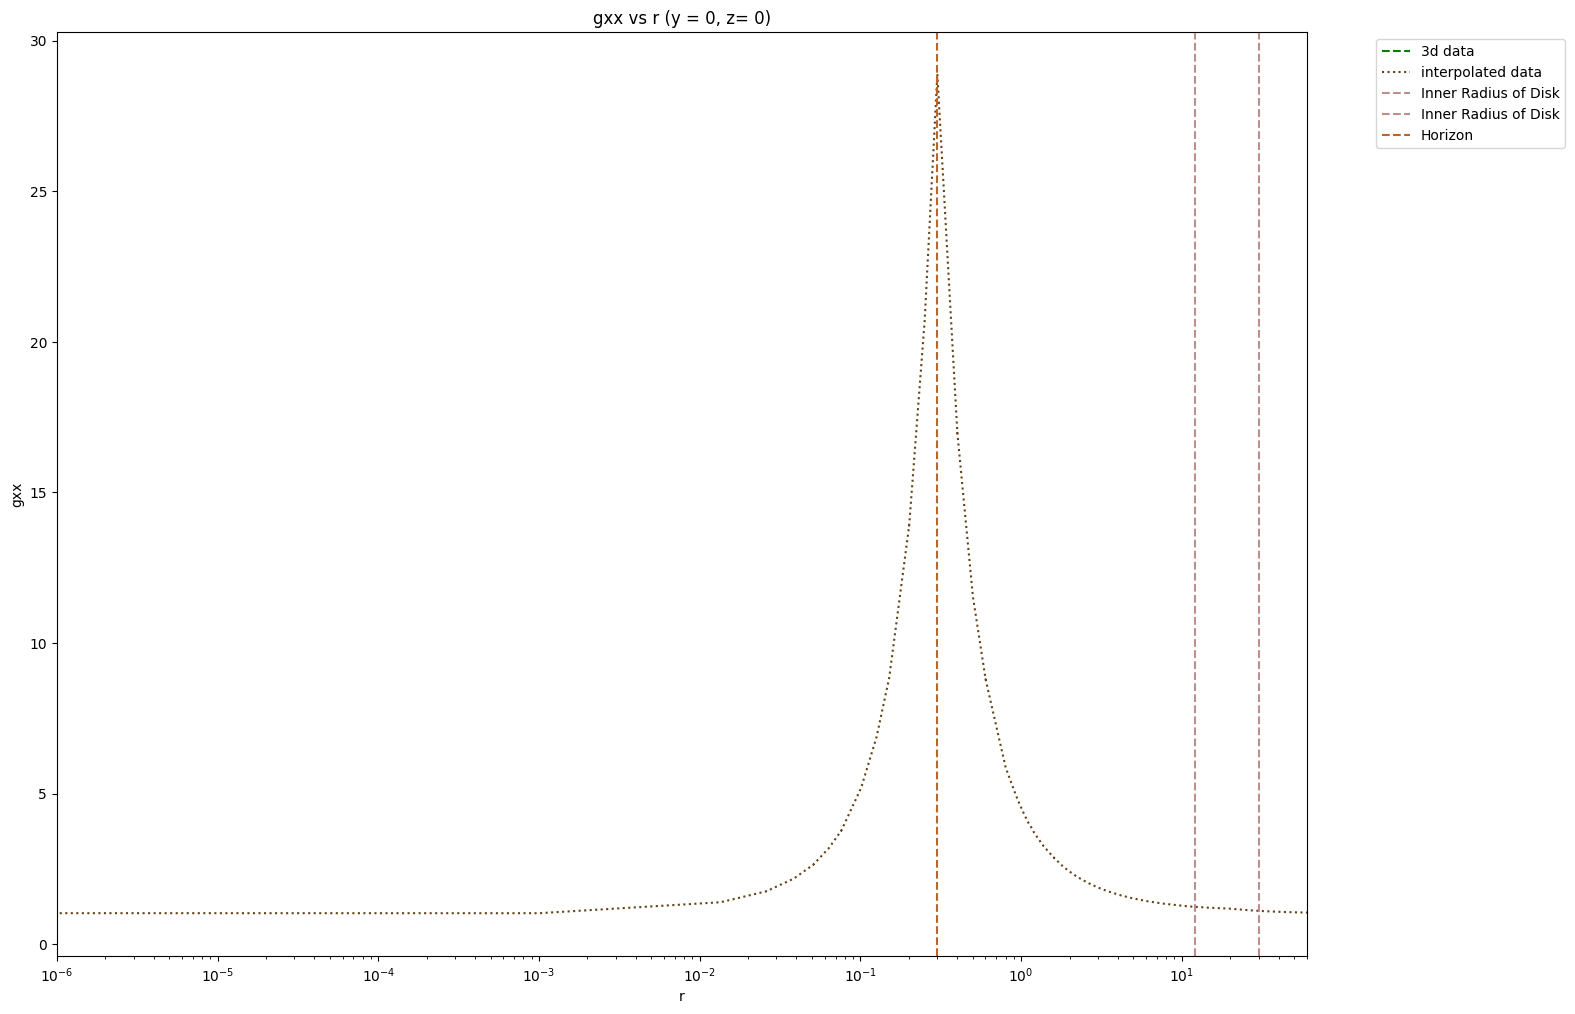

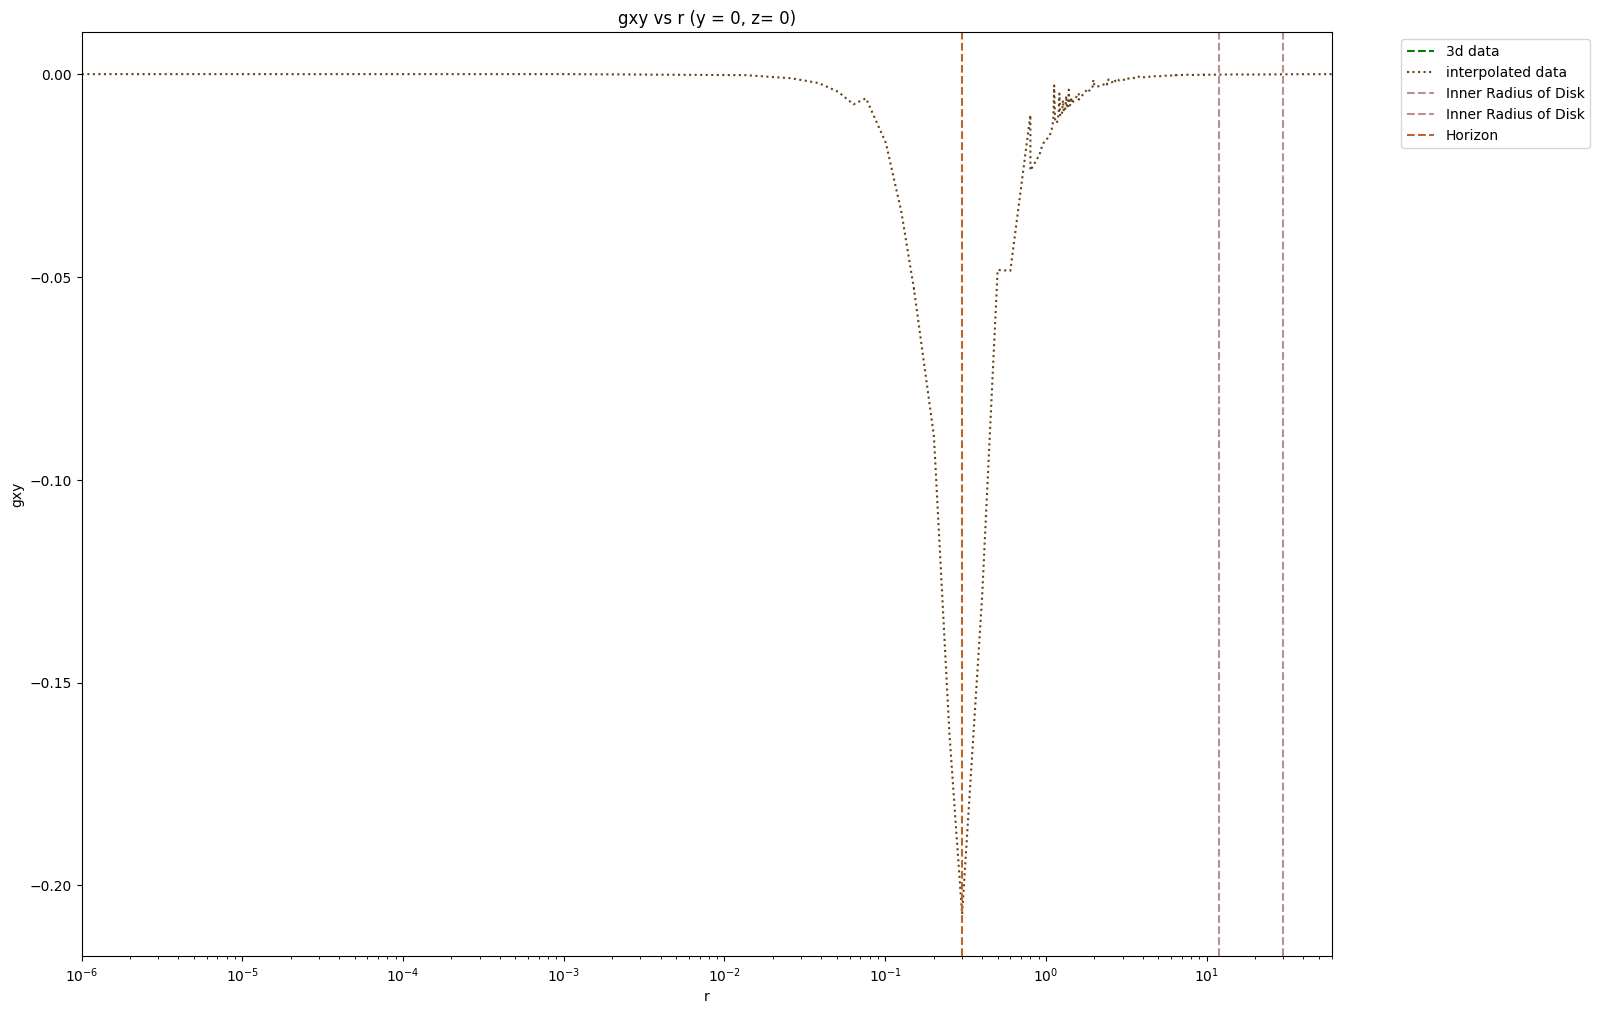

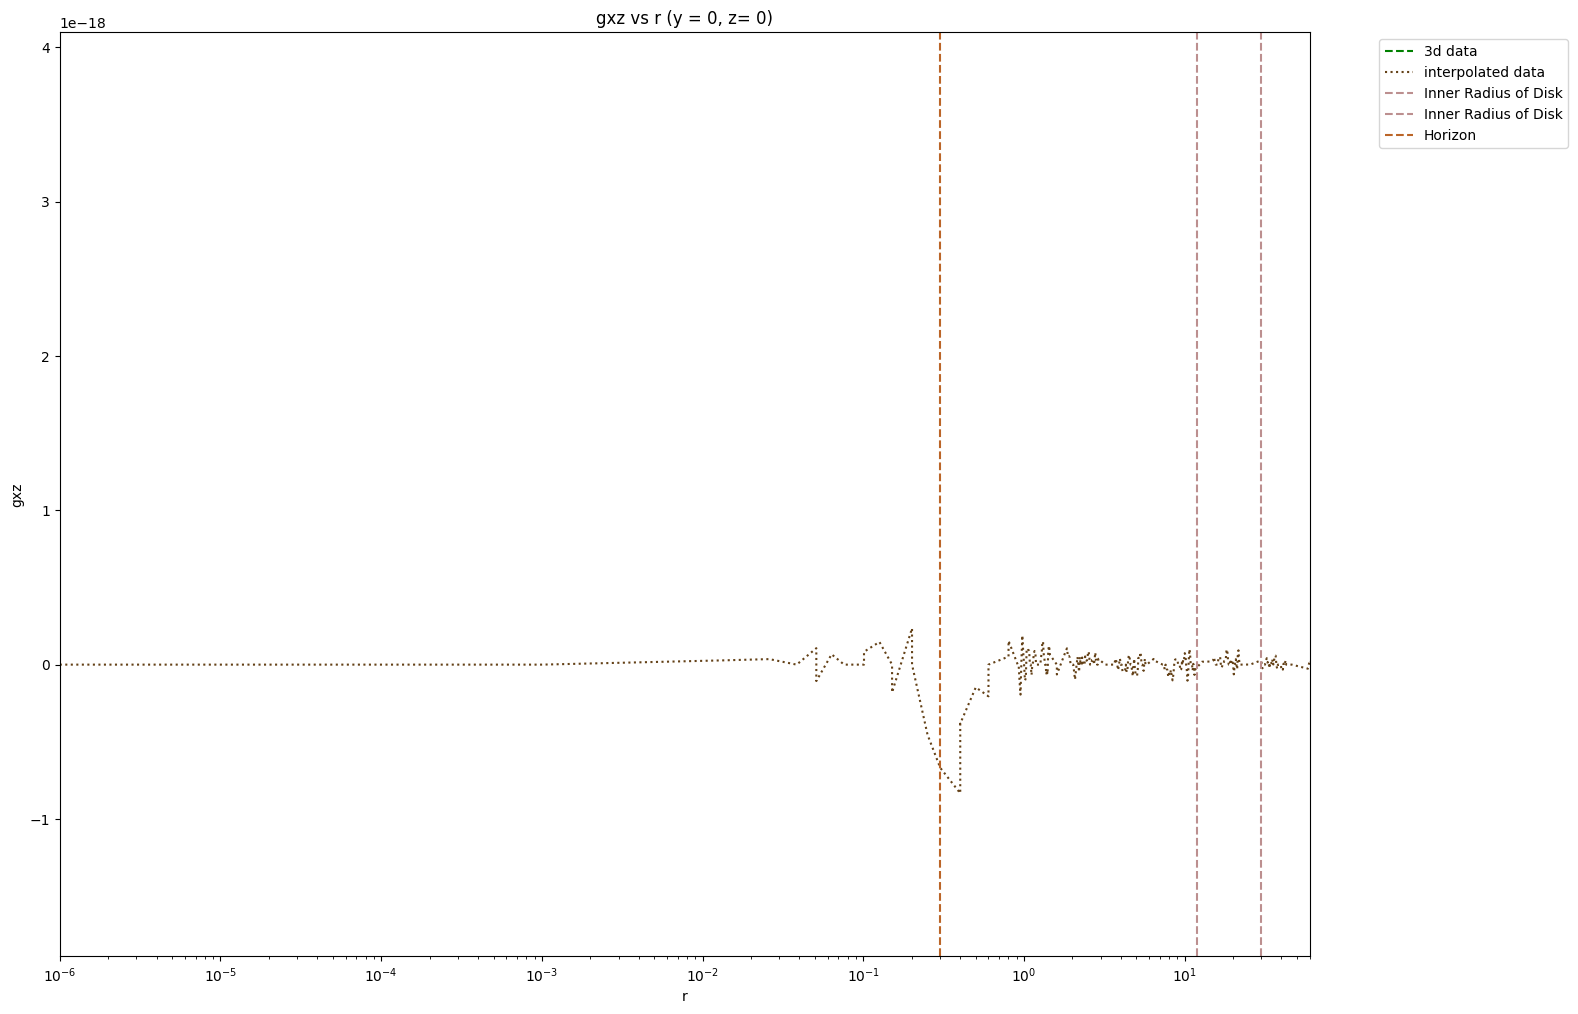

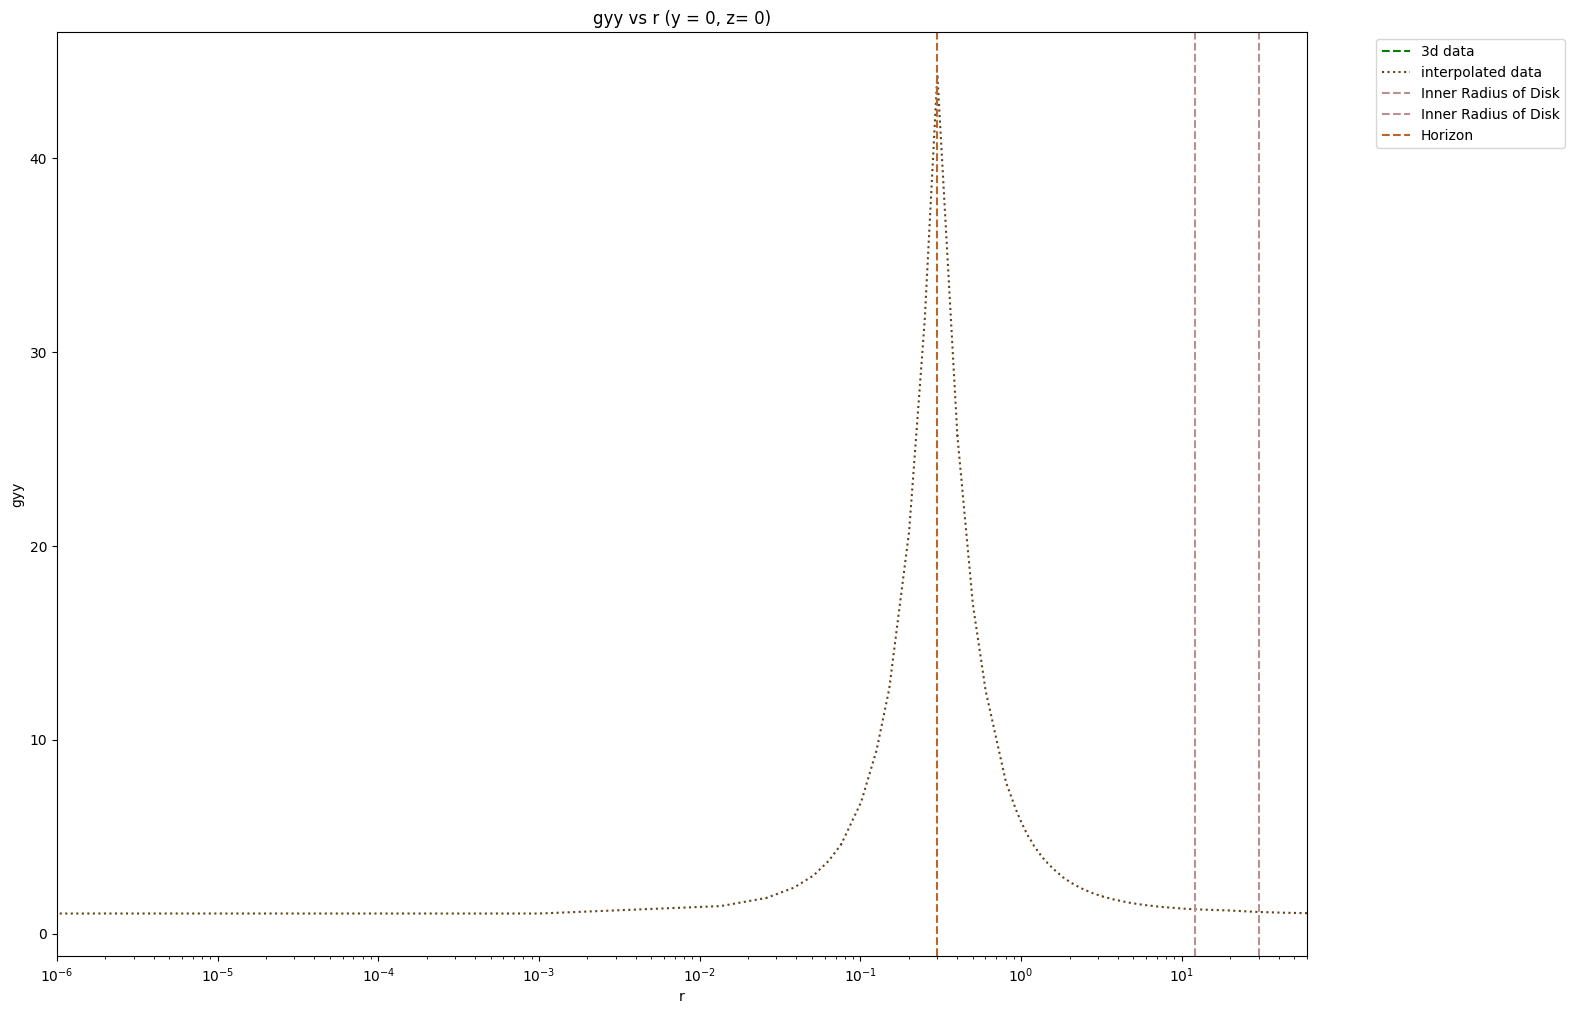

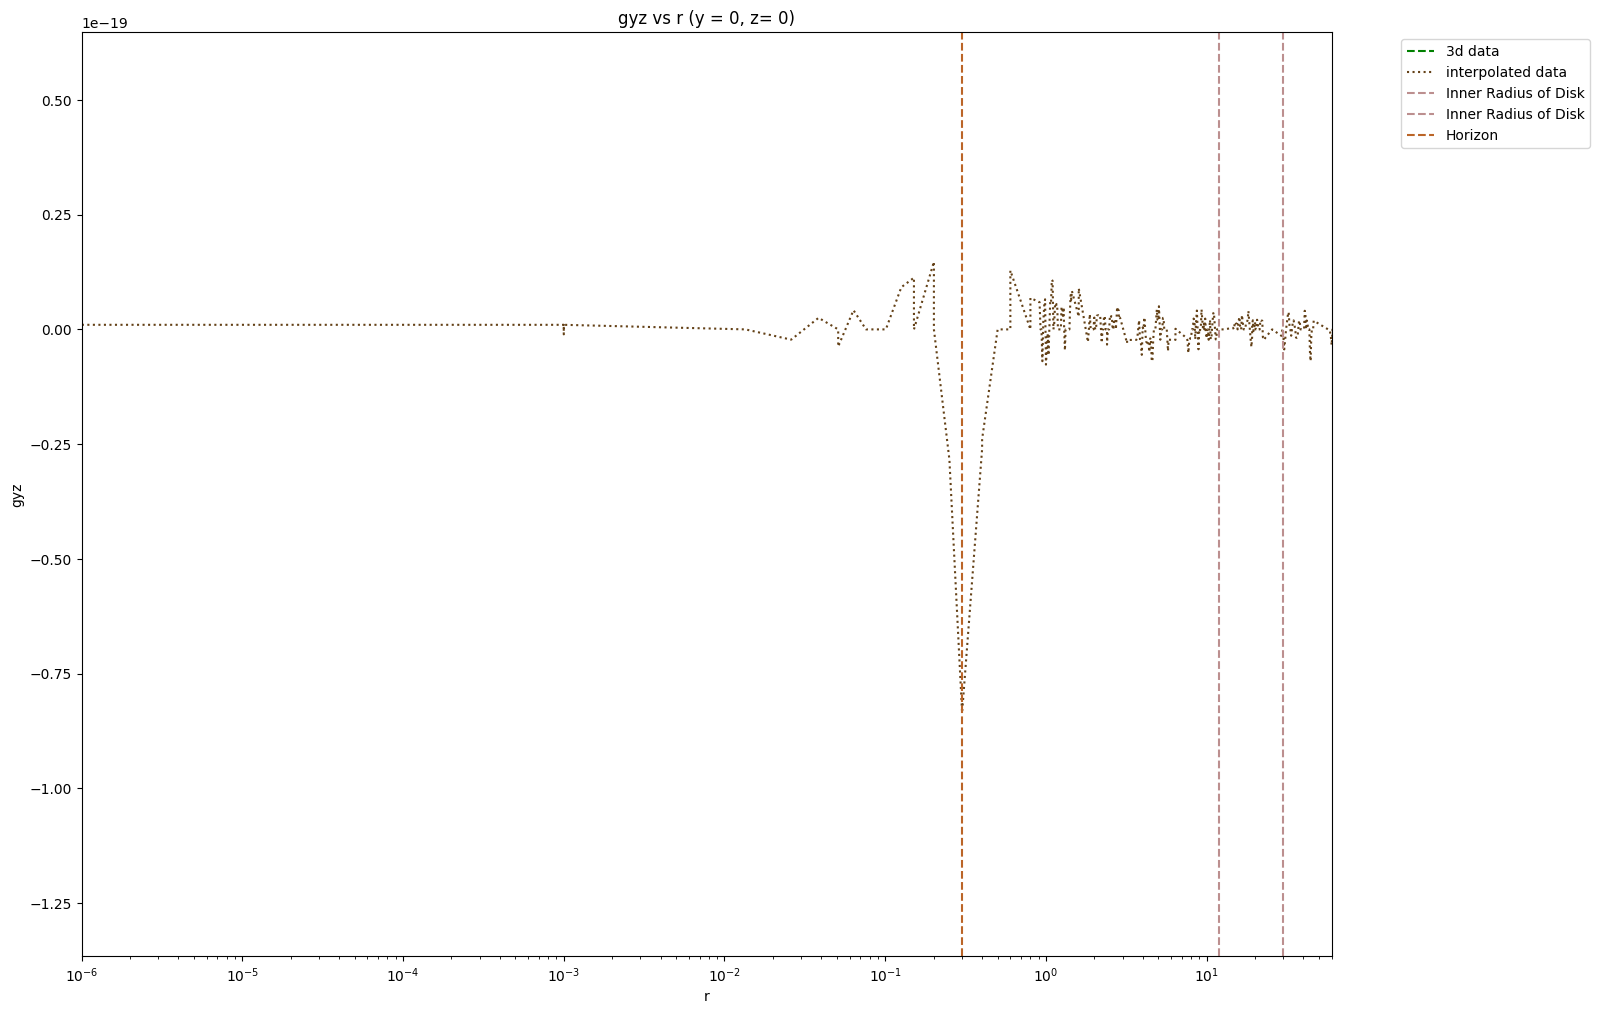

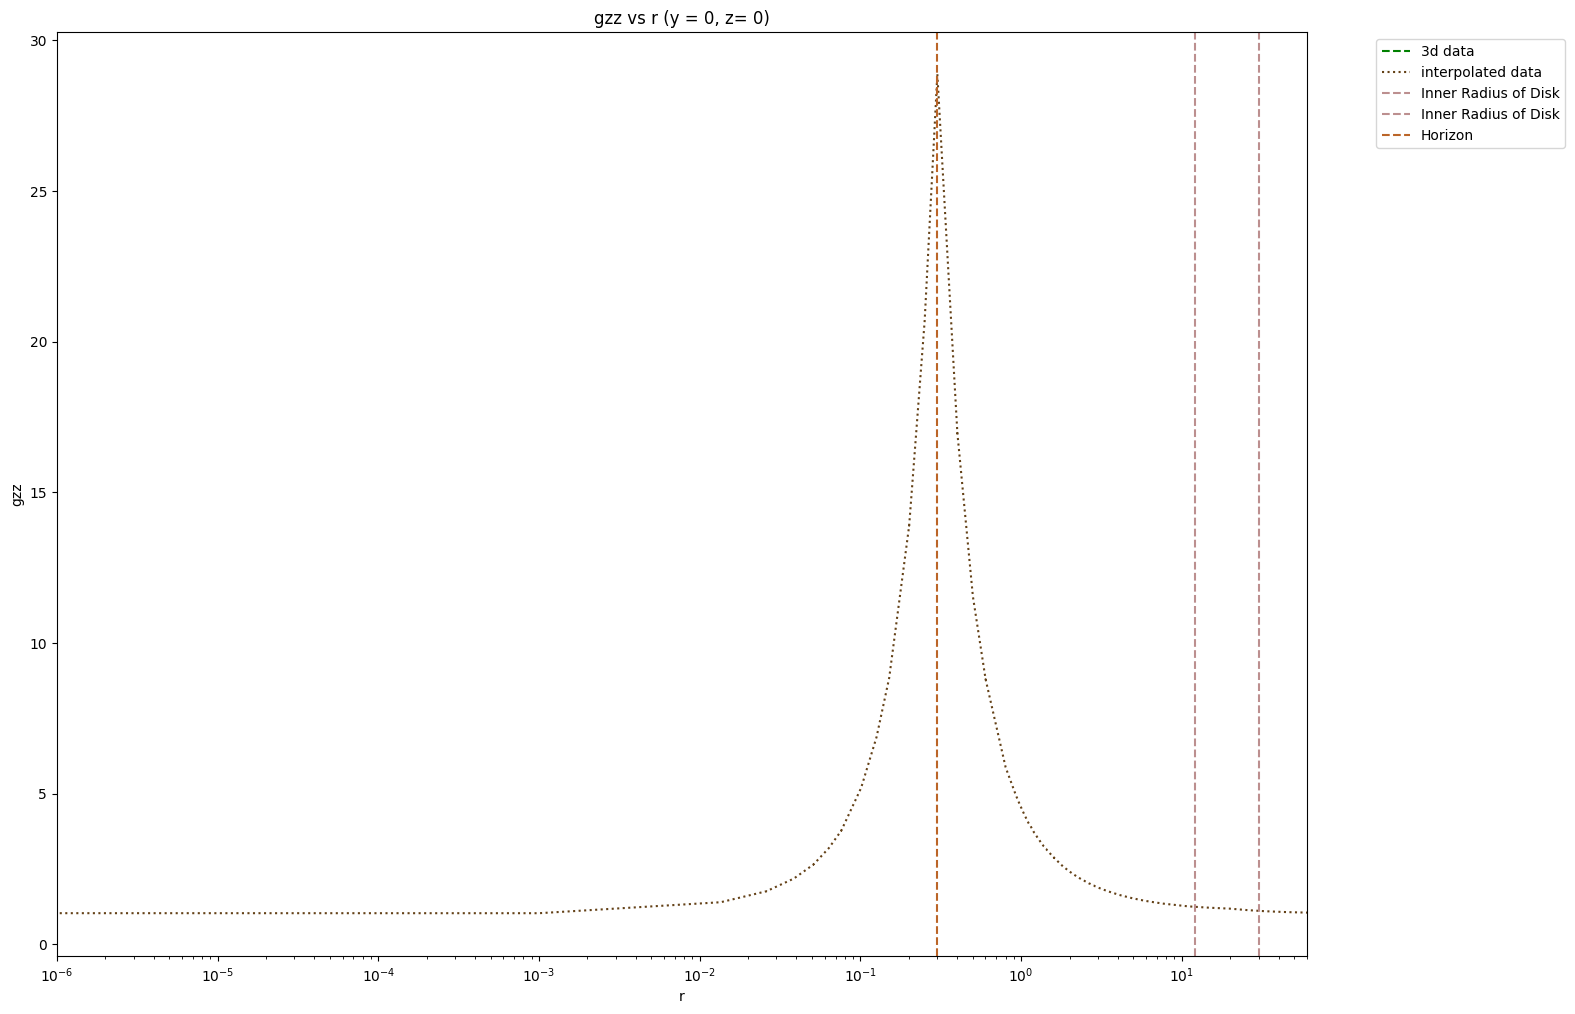

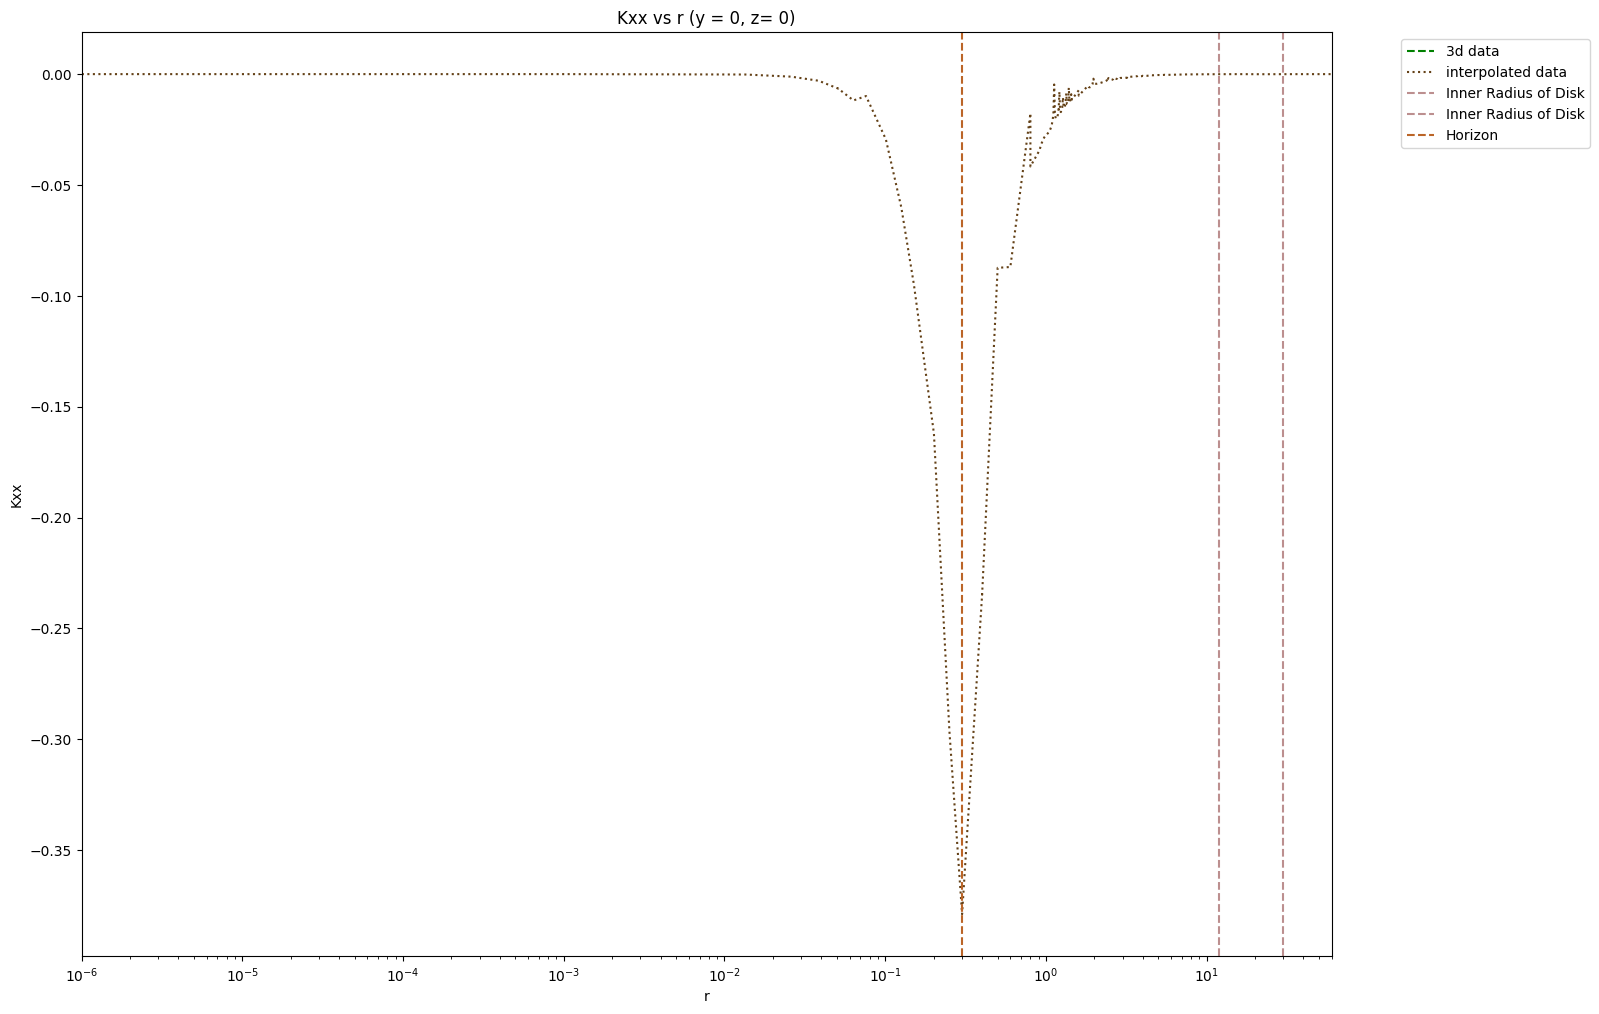

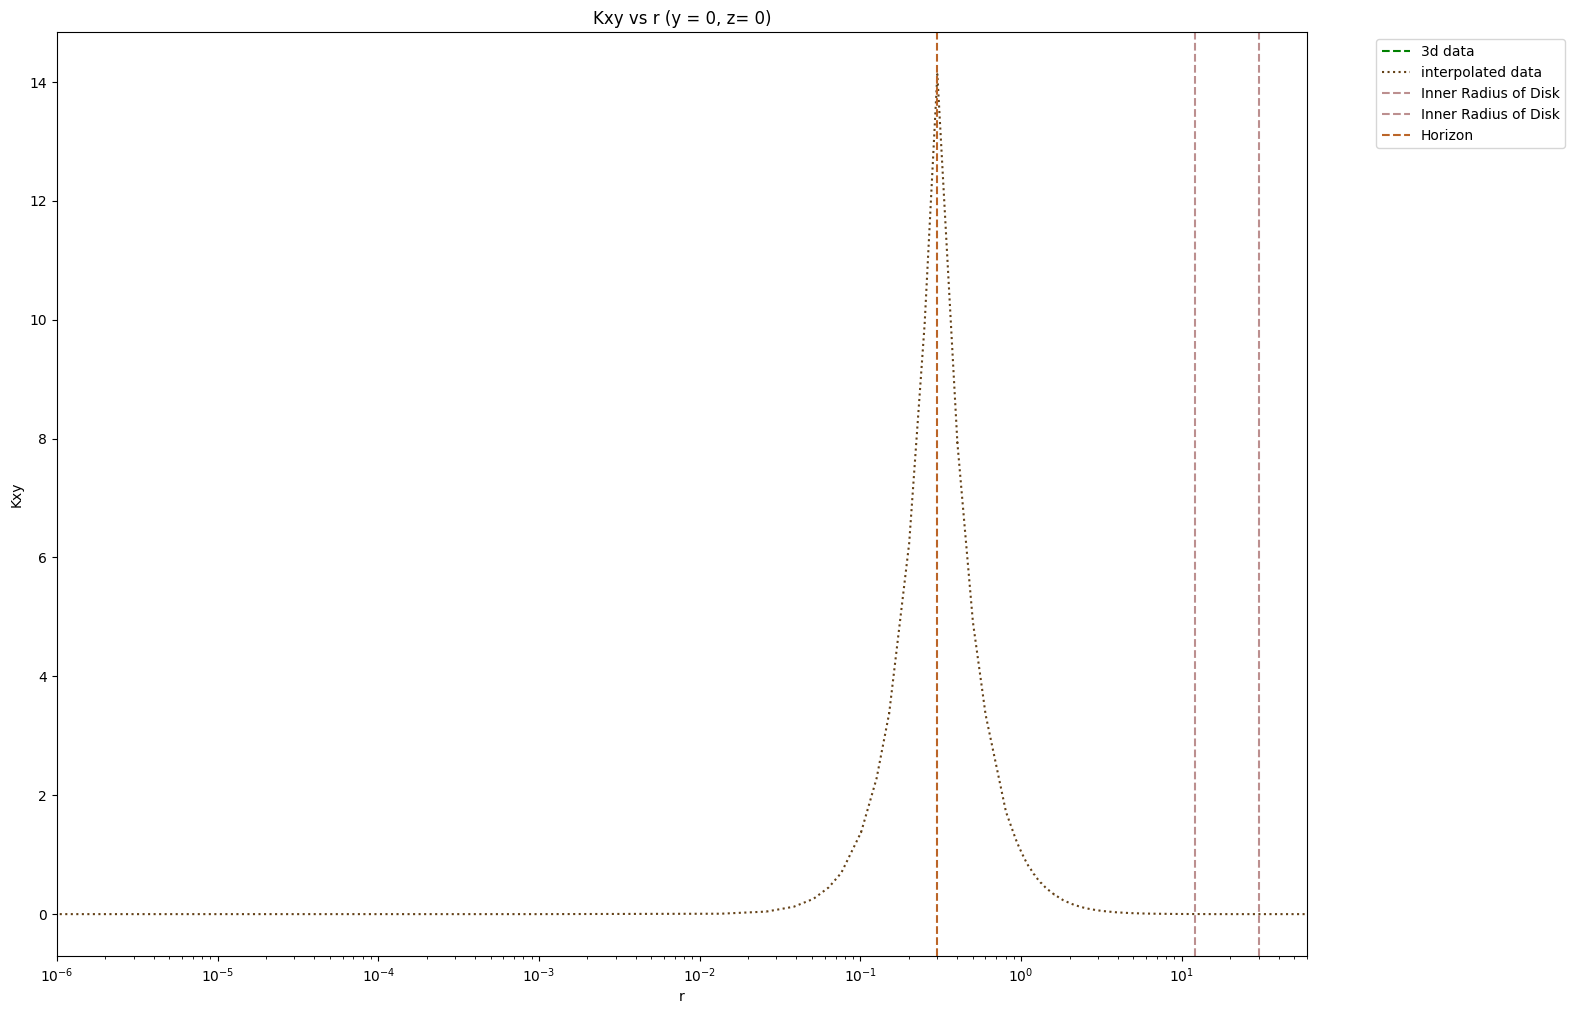

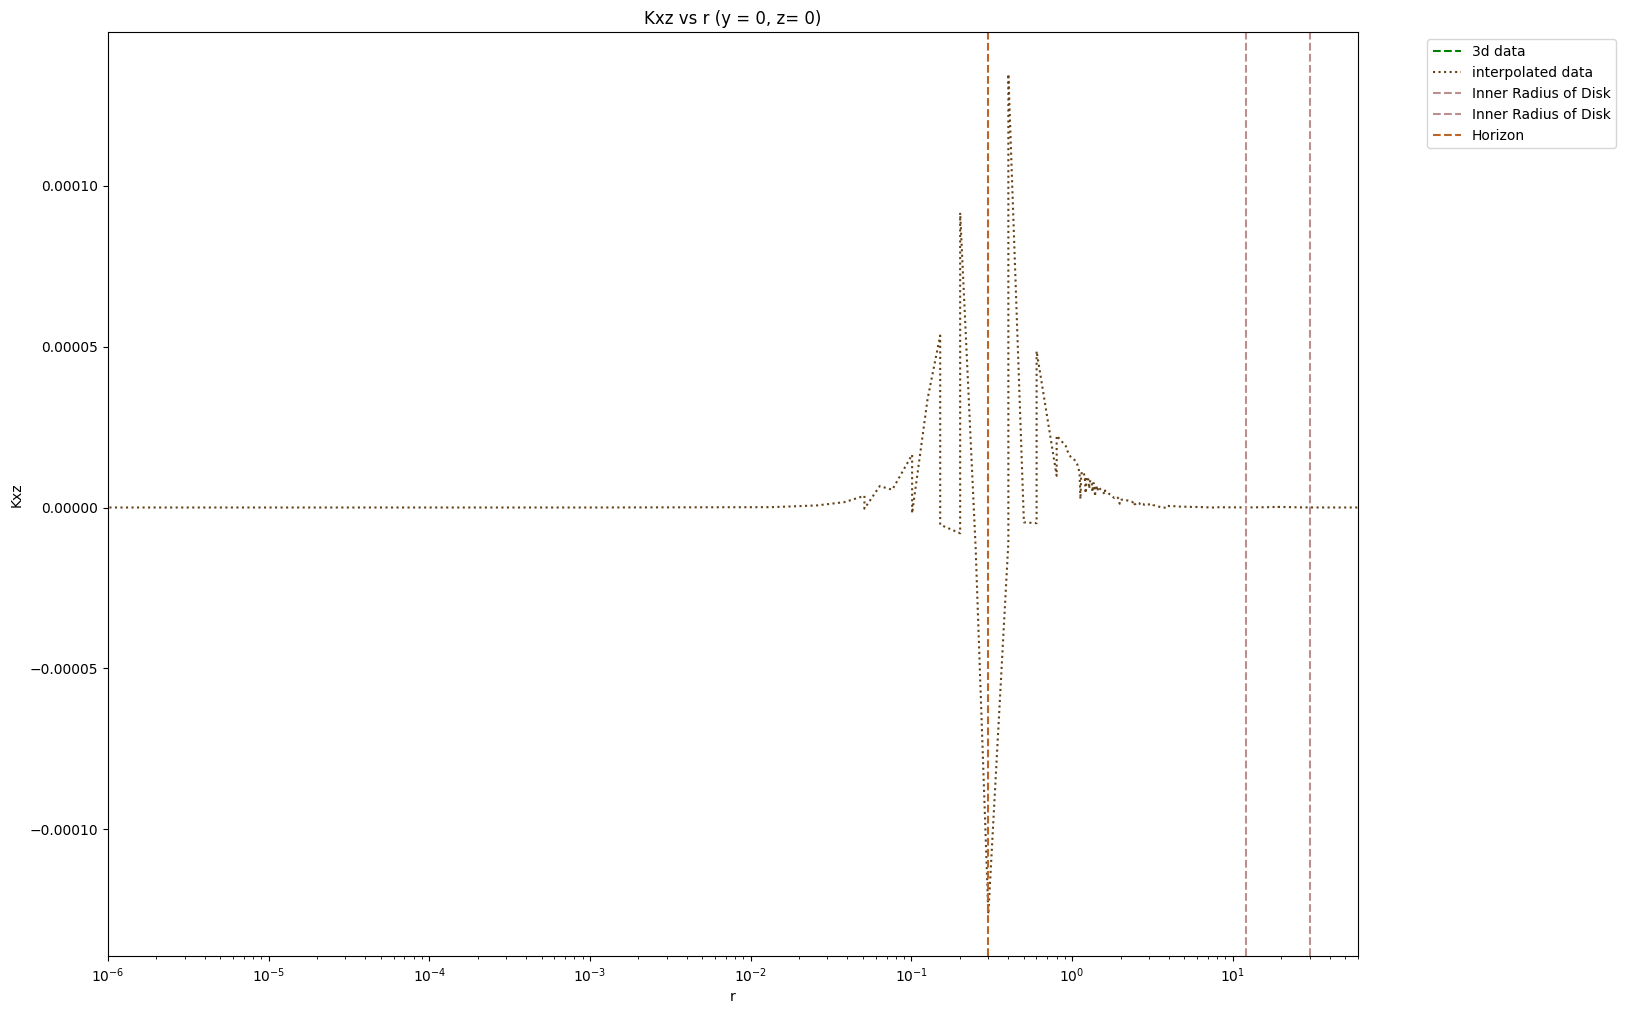

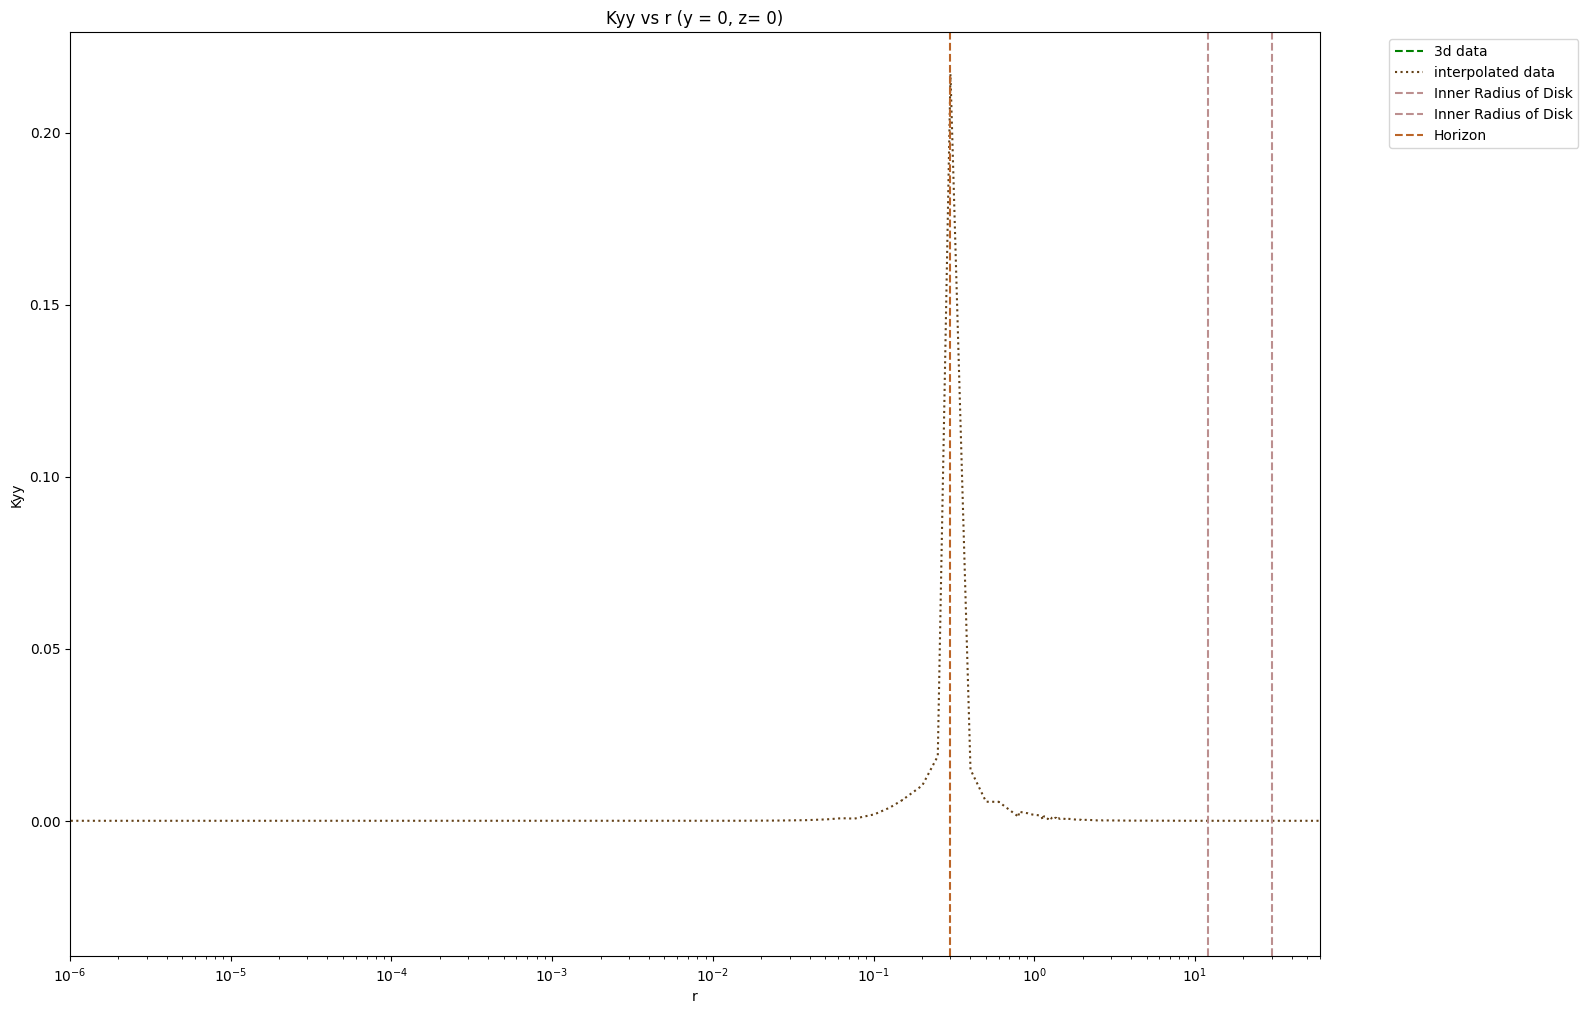

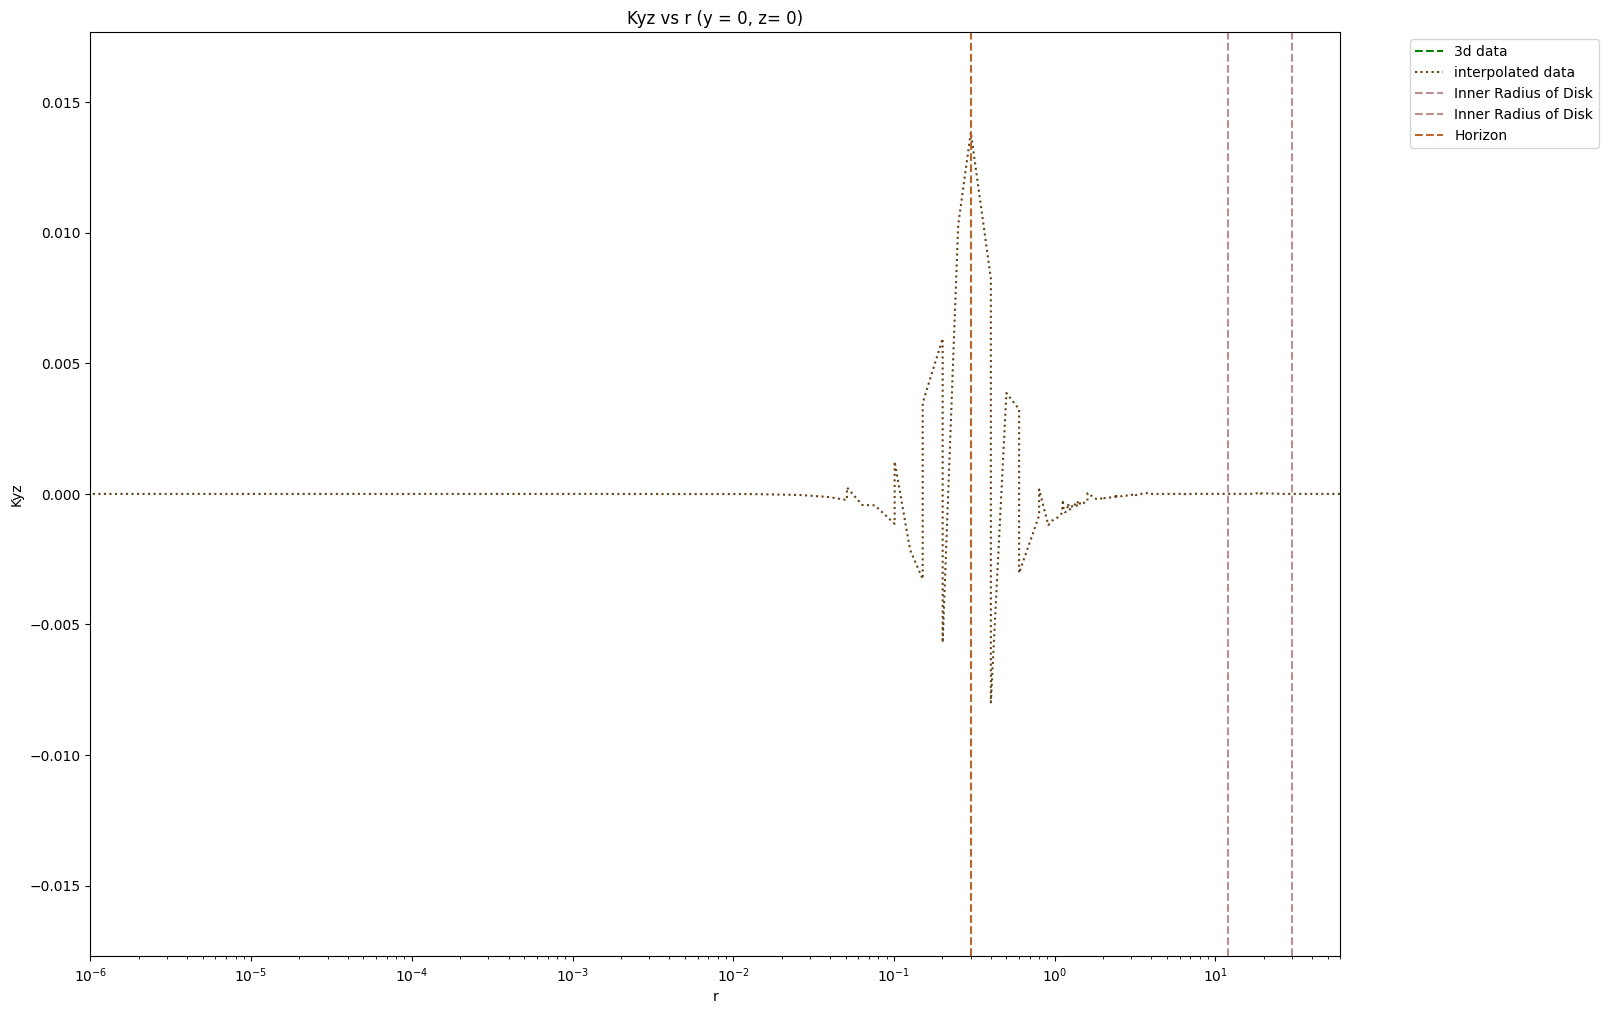

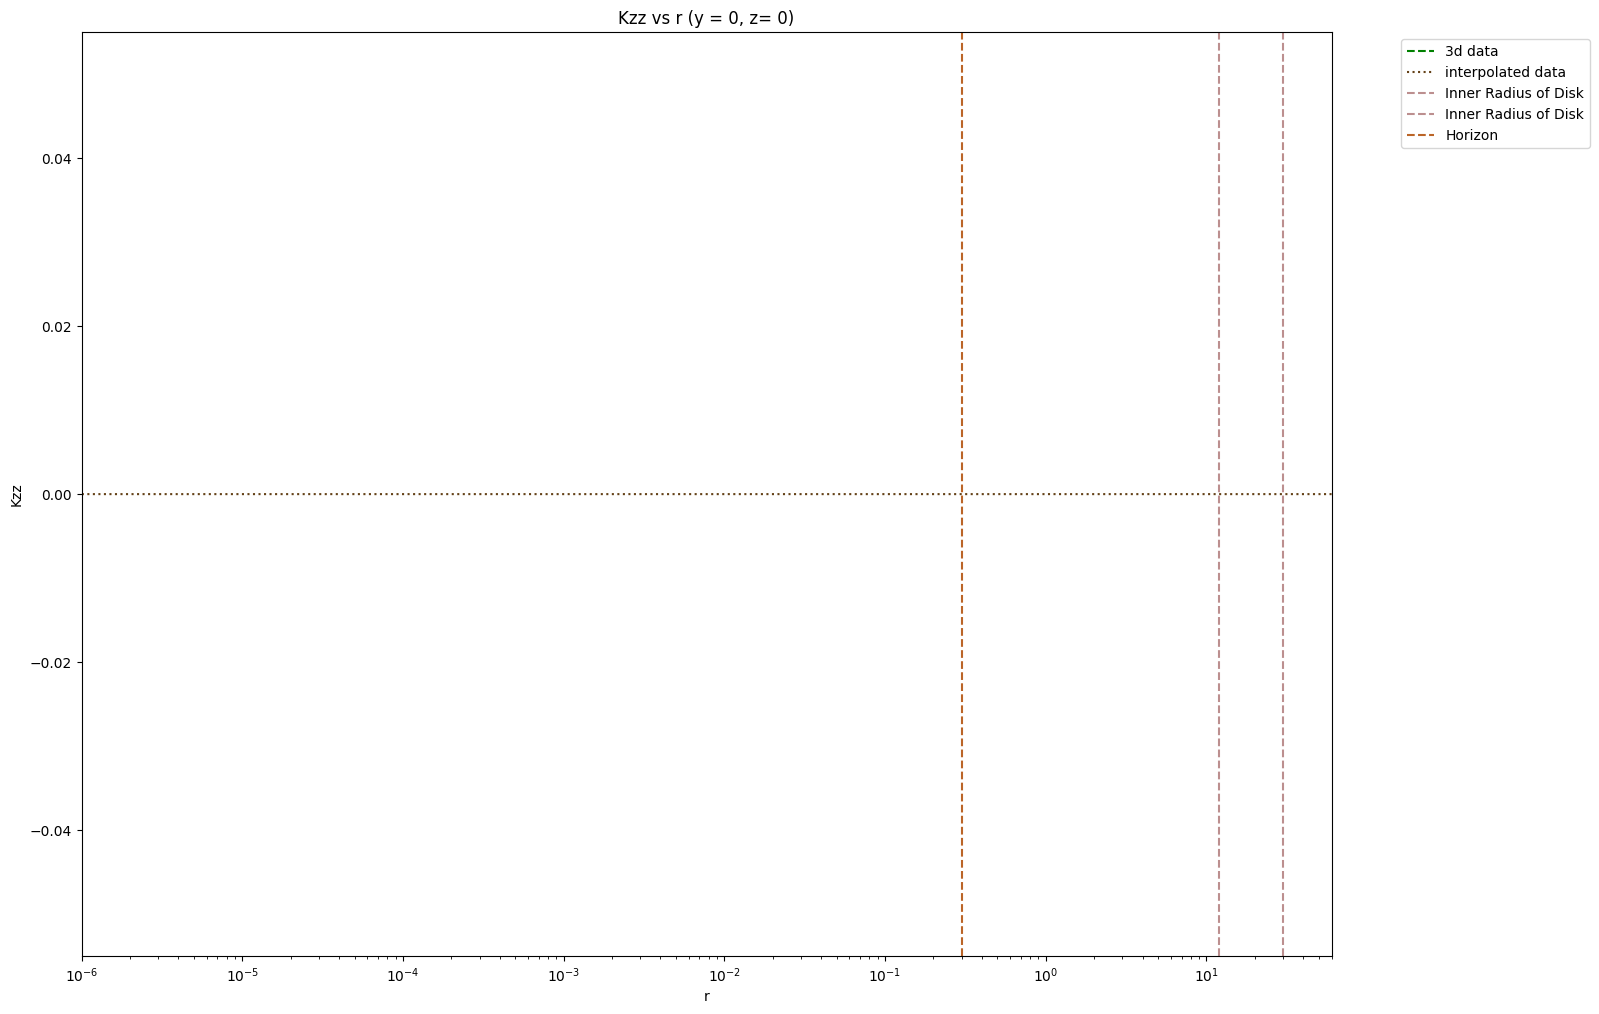

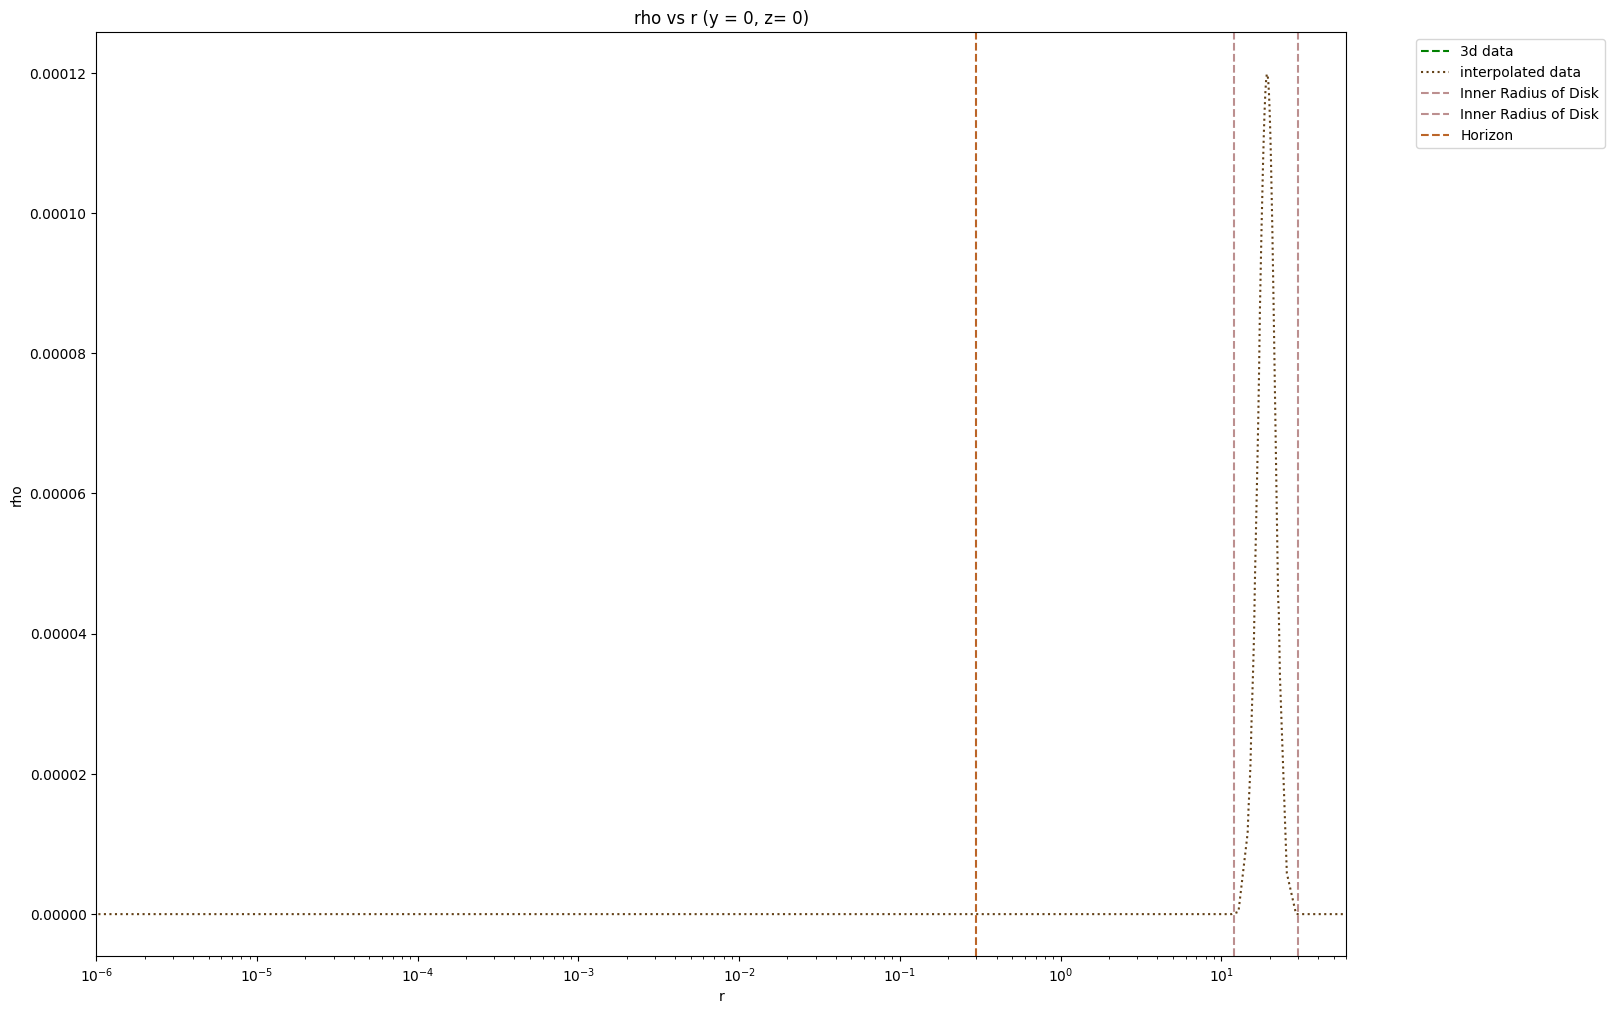

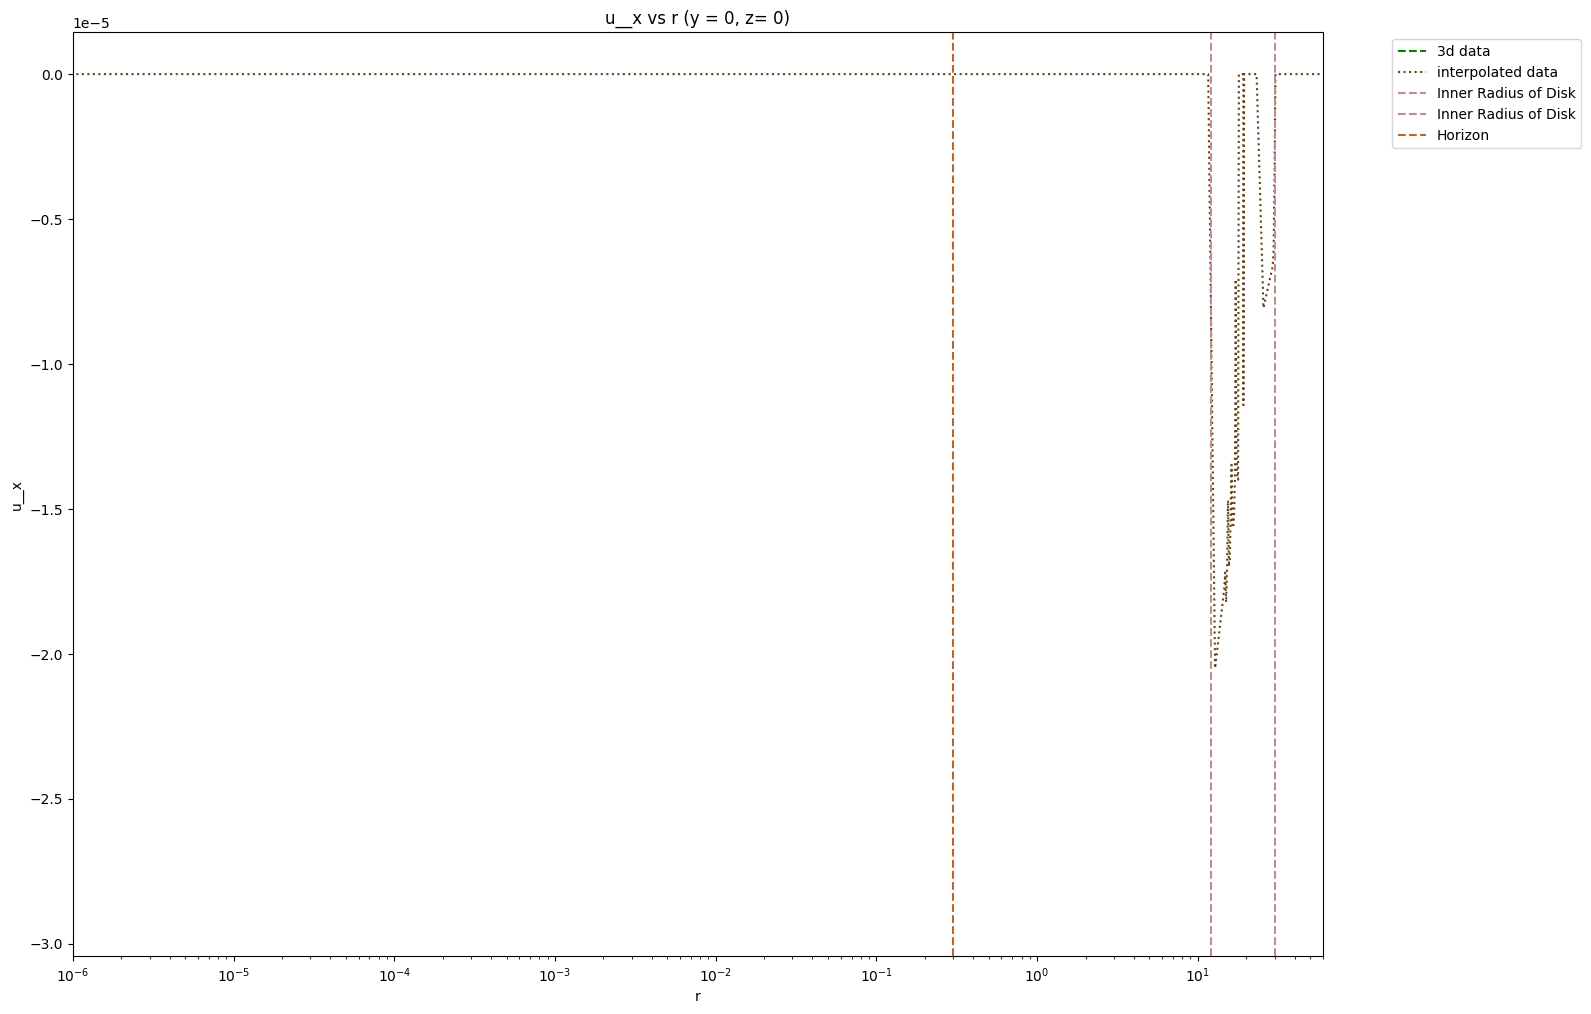

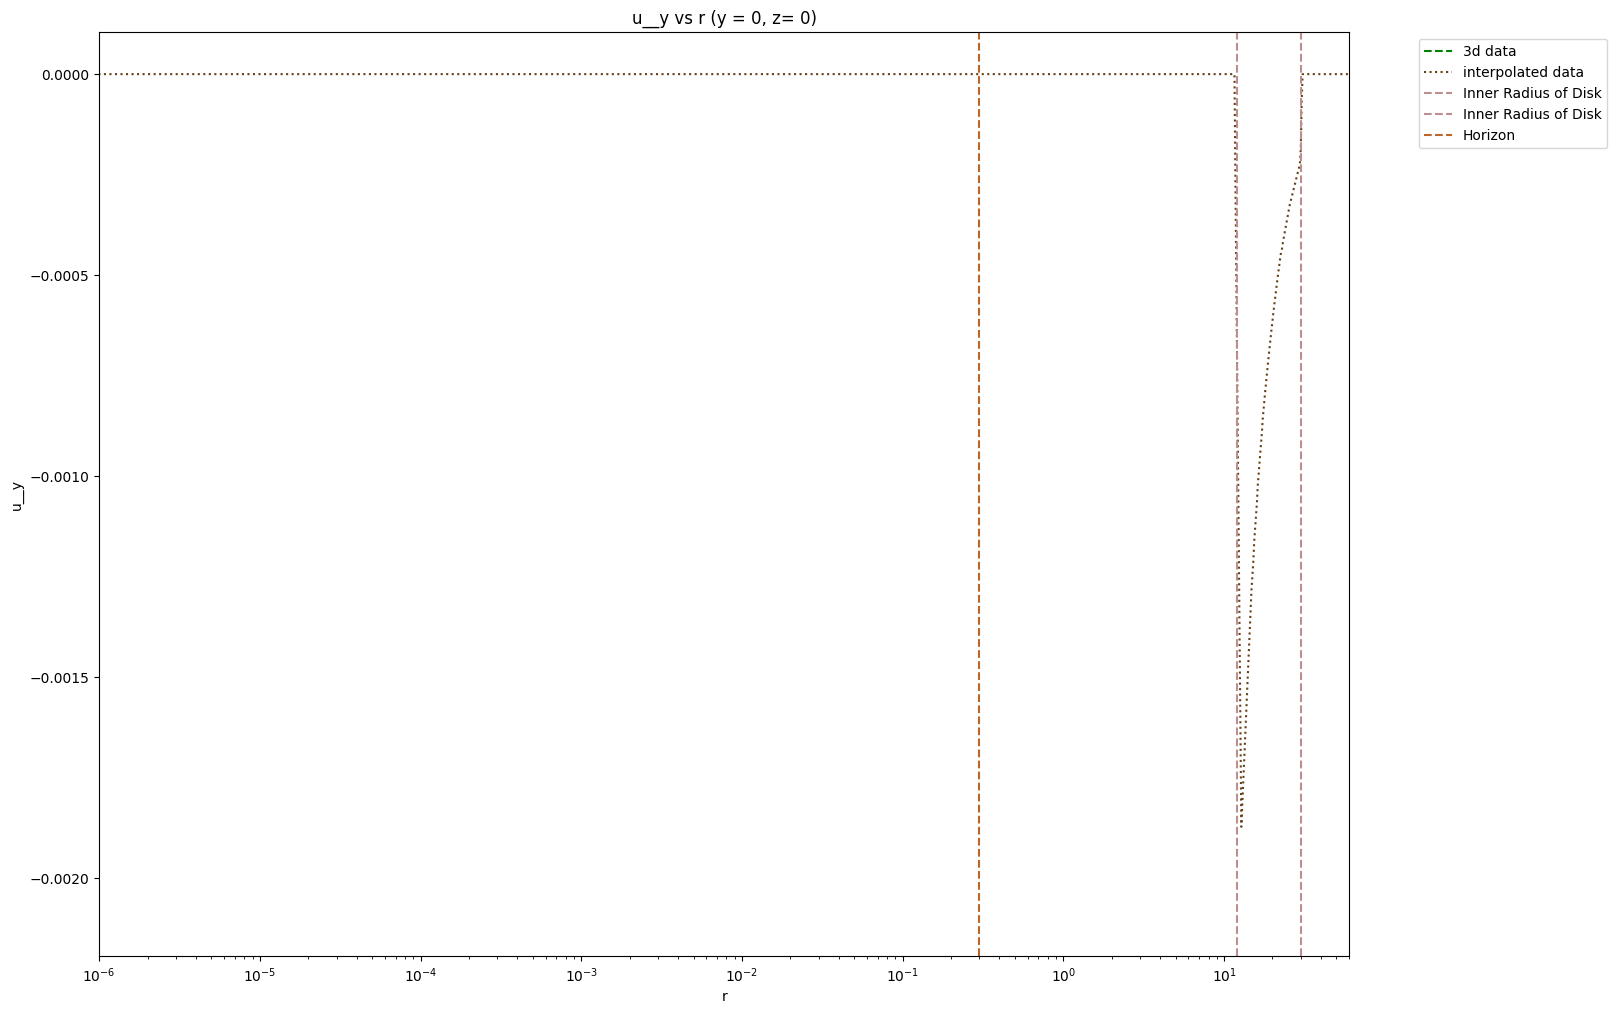

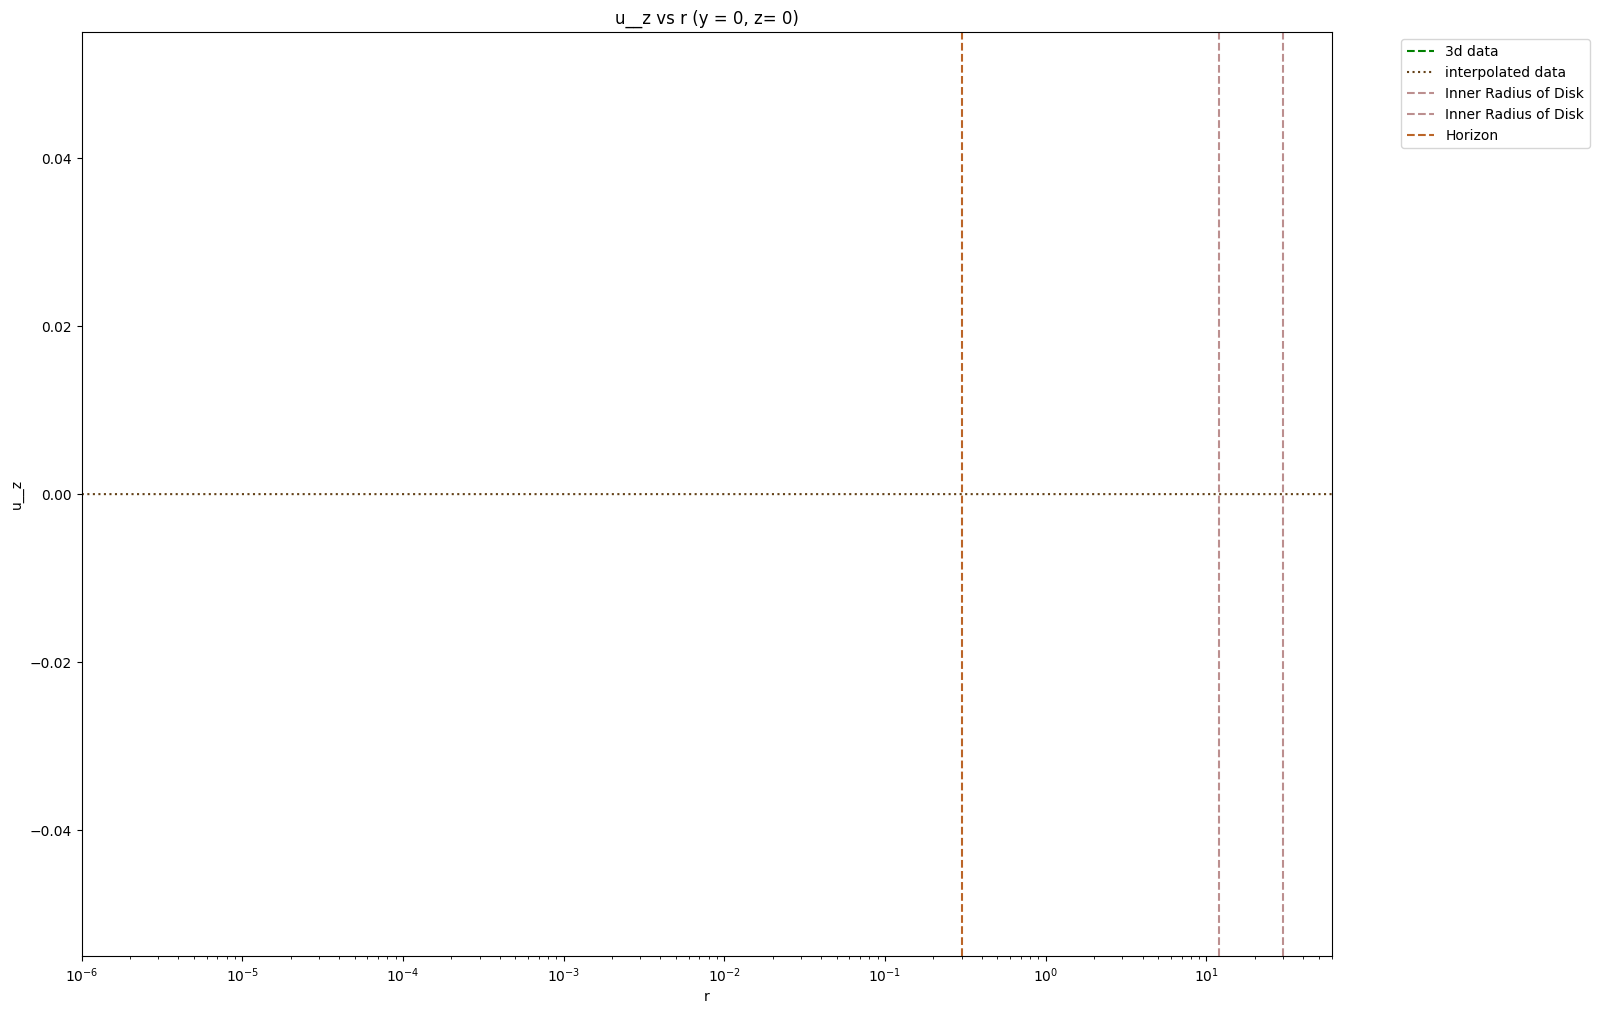

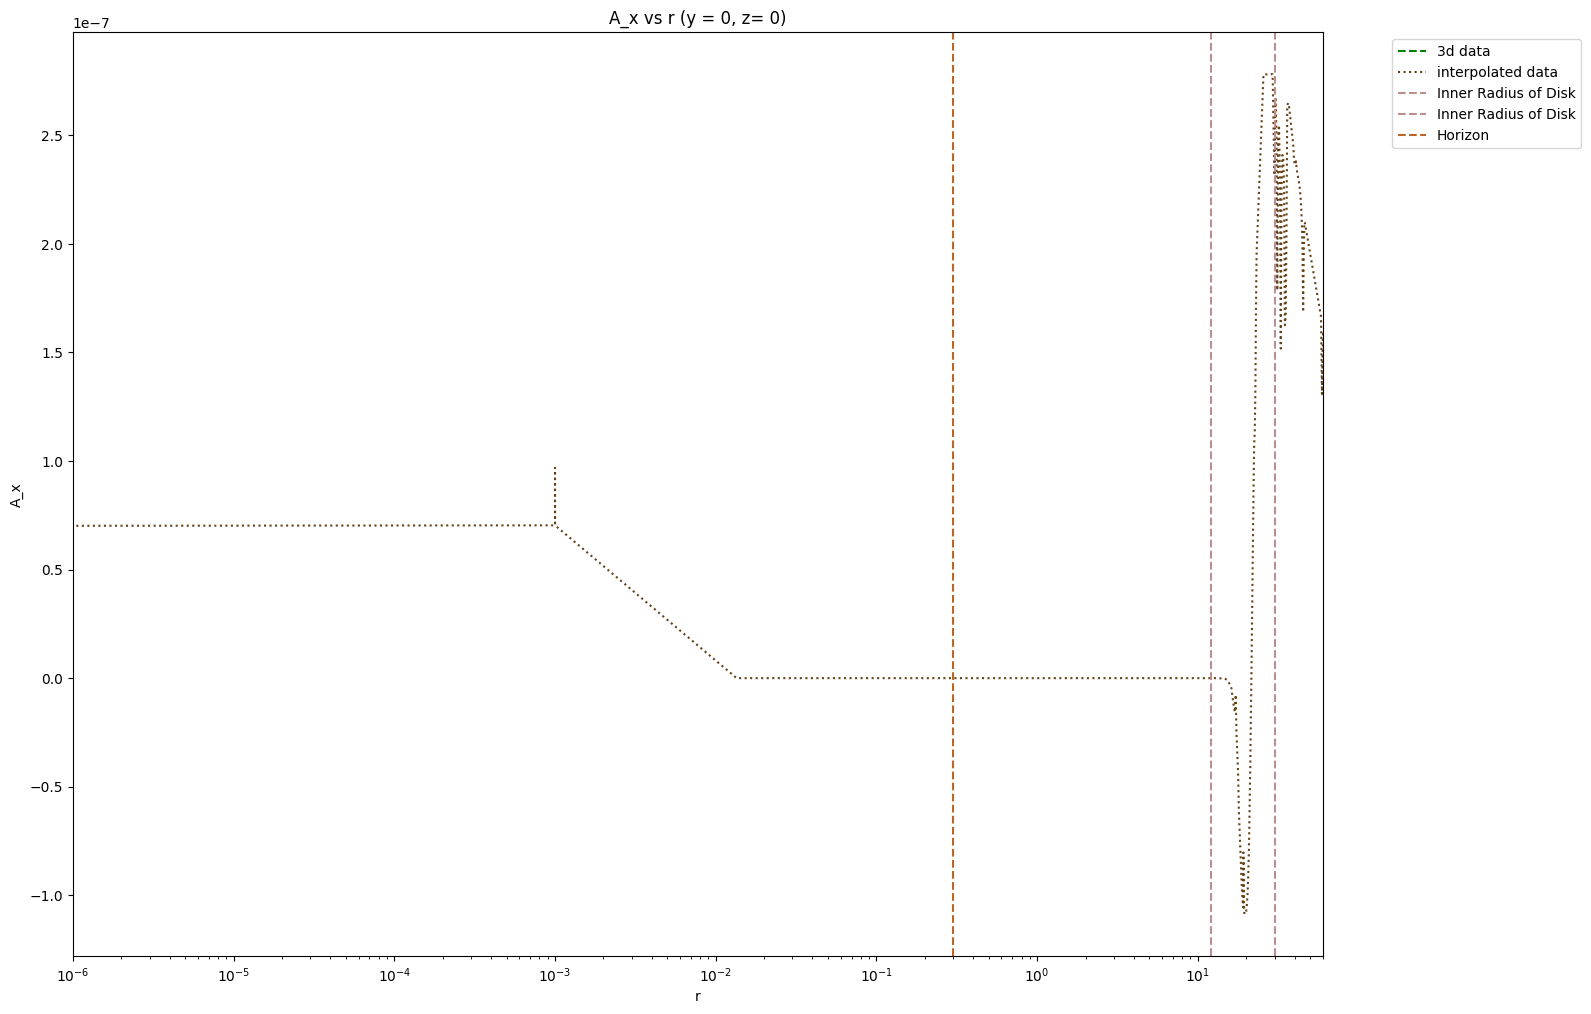

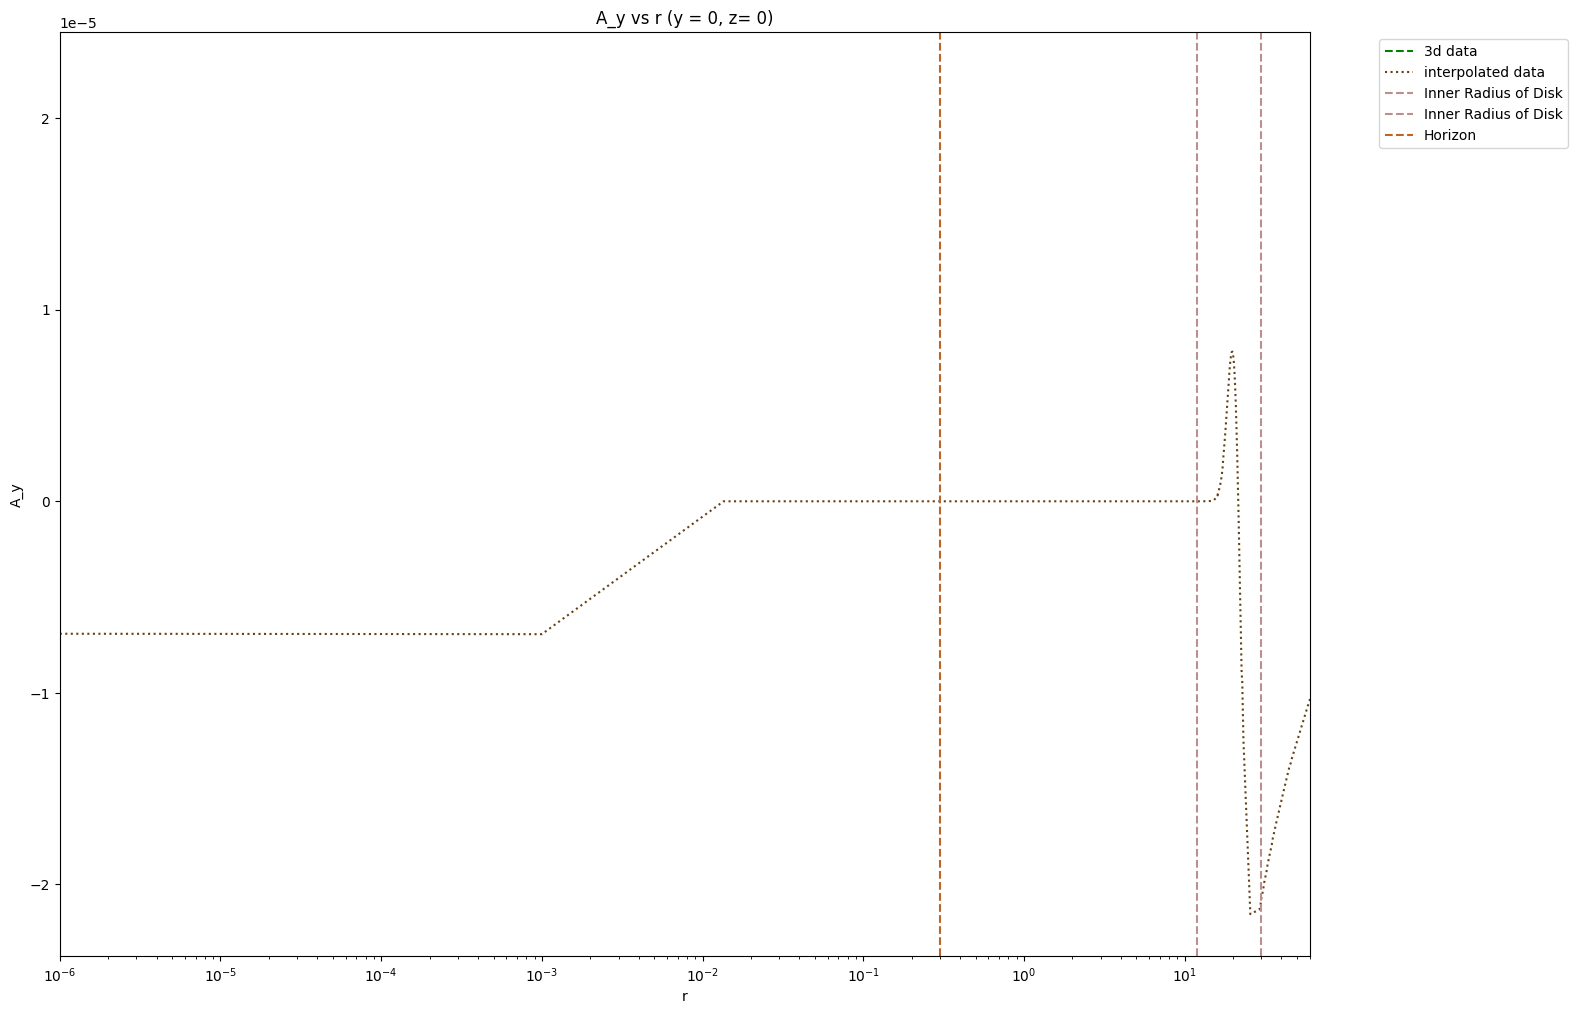

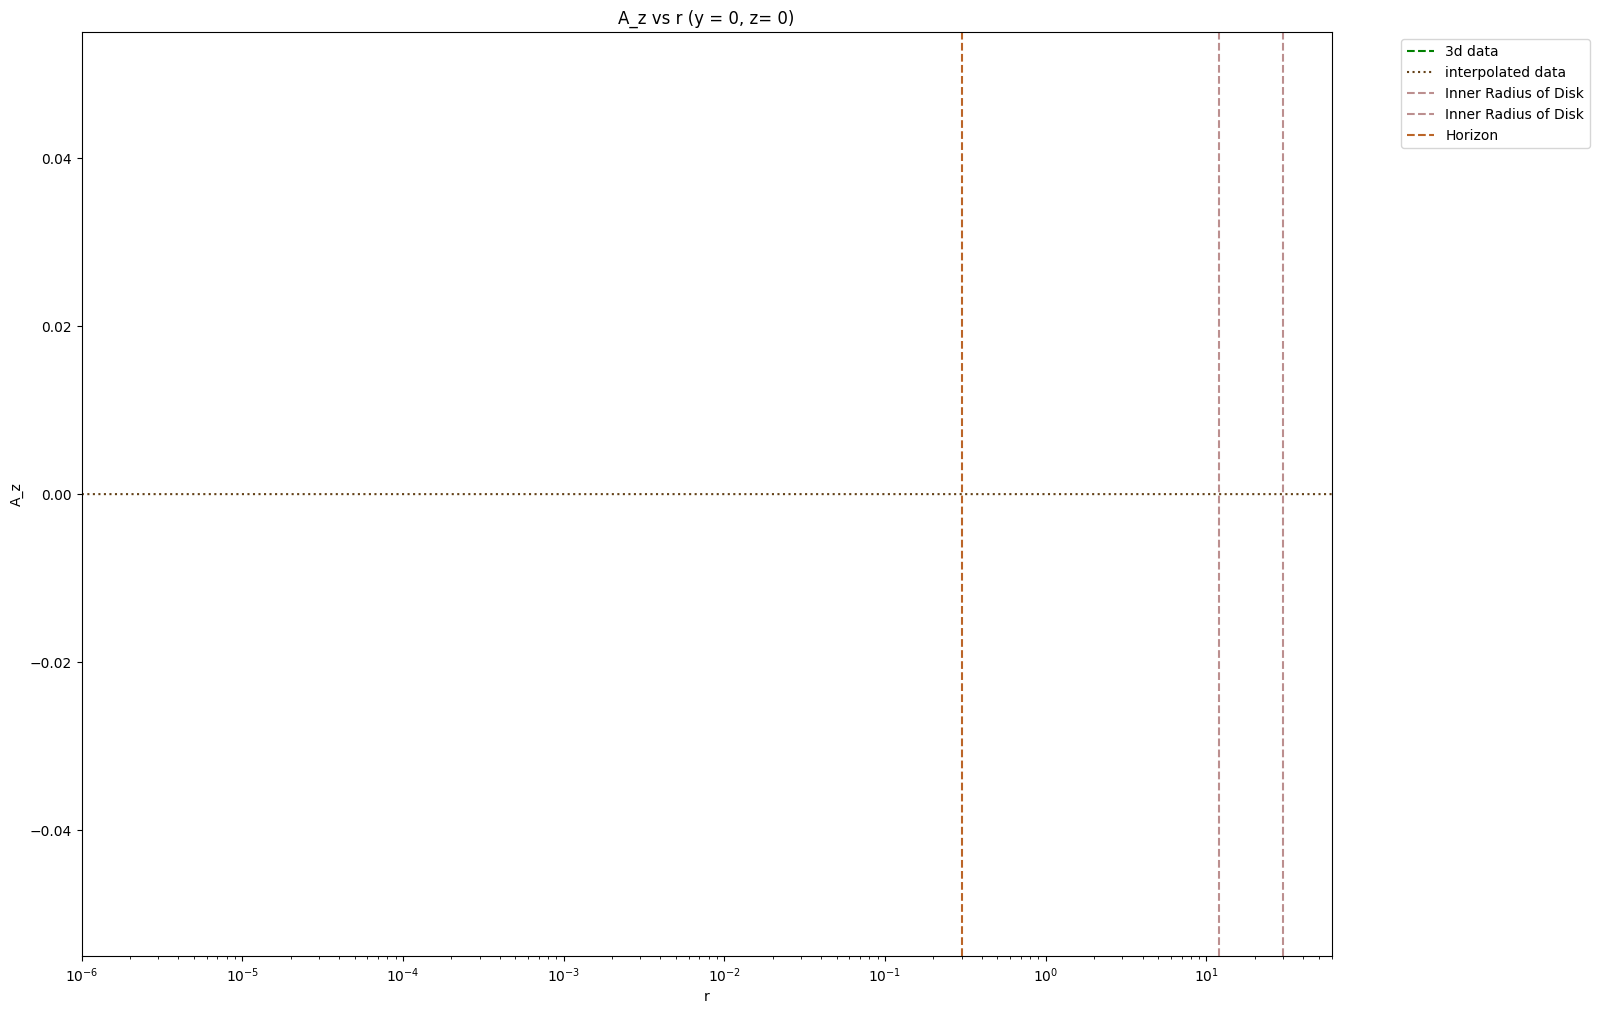

In [65]:
for col in list(df_3d.columns)[3:]:
    fig, ax = plt.subplots(figsize=(20,12))
    plt.subplots_adjust(right=0.75)
    plt.xlim(1e-6, 60)
    plt.xscale('log')
    #ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane["rho"], color='#644117', label="interpolated data")
    #ax.plot(df_2d_new_xplane["r"], df_2d_new_xplane[col], color='b', label="2d data")
    ax.plot(df_3d_xplane["r"], df_3d_xplane[col], color='g', linestyle="--", label="3d data")
    ax.plot(df_interpolated_xplane["x"], df_interpolated_xplane[col], color='#644117', linestyle=":", label="interpolated data")
    ax.axvline(x=np.float64(12.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(30.0), color="#bc8f8f", linestyle="--", label="Inner Radius of Disk")
    ax.axvline(x=np.float64(0.3), color="#bb6528", linestyle="--", label="Horizon")
    plt.xlabel("r")
    plt.ylabel(col)
    plt.title("{} vs r (y = 0, z= 0)".format(col))
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

In [178]:
def locate_point(
    r_arr, theta_arr, phi_arr, p
):  # r_arr, theta_arr, phi_arr define the ID grid, p defines a point in the new grid
    # p should be a tuple (x,y,z) in cartesian coords
    phi_arr = np.append(phi_arr[-2], np.append(phi_arr, phi_arr[1]))
    x, y, z = p
    r_0 = np.sqrt(x**2 + y**2 + z**2)
    theta_0 = np.arccos(z / r_0)
    skip = False
    origin = False
    phi_0 = np.arctan2(y, x)
    phi_0 = phi_0 % (2 * np.pi)  # ensures phi takes values between [0,2pi]
    ts = np.zeros(2, dtype=np.float64)
    ps = np.zeros(2, dtype=np.float64)
    rs = np.zeros(2, dtype=np.float64)
    for i in range(1, len(phi_arr) - 1):
        if phi_0 == phi_arr[i]:
            ps[0] = phi_arr[i - 1]
            ps[1] = phi_arr[i + 1]
            break
        if phi_arr[i] < phi_0 < phi_arr[i + 1]:
            ps[0] = phi_arr[i]
            ps[1] = phi_arr[i + 1]
            break
    if theta_0 == theta_arr[0]:
        ts[0] = theta_arr[1]
        ps = np.append(ps, np.array([phi_arr[-2] - ps[0], phi_arr[-2] - ps[1]]))
        skip = True
    if theta_0 == theta_arr[-1]:
        ts[0] = theta_arr[-2]
        ps = np.append(ps, np.array([phi_arr[-2] - ps[0], phi_arr[-2] - ps[1]]))
        skip = True

    if not skip:
        for i in range(len(theta_arr)):
            if theta_0 == theta_arr[i]:
                ts[0] = theta_arr[i - 1]
                ts[1] = theta_arr[i + 1] 
                break
            if theta_arr[i] < theta_0 < theta_arr[i + 1]:
                ts[0] = theta_arr[i]
                ts[1] = theta_arr[i + 1]
                break

    for i in range(len(r_arr)):
        if r_0 == r_arr[i]:
            rs[0] = r_arr[i - 1]
            rs[1] = r_arr[i + 1]
            break
        if r_arr[i] < r_0 < r_arr[i + 1]:
            rs[0] = r_arr[i]
            rs[1] = r_arr[i + 1]
            break
    tc = 8
    if rs[0] == np.float64(0.0):
        origin = True
        tc = 5

    combinations = np.zeros((tc, 3), dtype=np.float64)

    if origin:
        combinations[0] = np.array([np.float64(0), np.float64(0), np.float64(0)])
        if skip:
            combinations[1] = np.array([rs[1], ts[0], ps[0]])
            combinations[2] = np.array([rs[1], ts[0], ps[1]])
            combinations[3] = np.array([rs[1], ts[0], ps[2]])
            combinations[4] = np.array([rs[1], ts[0], ps[3]])
        else:
            combinations[1] = np.array([rs[1], ts[0], ps[0]])
            combinations[2] = np.array([rs[1], ts[0], ps[1]])
            combinations[3] = np.array([rs[1], ts[1], ps[0]])
            combinations[4] = np.array([rs[1], ts[1], ps[1]])
    else:
        if skip:
            combinations[0] = np.array([rs[0], ts[0], ps[0]])
            combinations[1] = np.array([rs[0], ts[0], ps[1]])
            combinations[2] = np.array([rs[0], ts[0], ps[2]])
            combinations[3] = np.array([rs[0], ts[0], ps[3]])
            combinations[4] = np.array([rs[1], ts[0], ps[0]])
            combinations[5] = np.array([rs[1], ts[0], ps[1]])
            combinations[6] = np.array([rs[1], ts[0], ps[2]])
            combinations[7] = np.array([rs[1], ts[0], ps[3]])
        else:
            combinations[0] = np.array([rs[0], ts[0], ps[0]])
            combinations[1] = np.array([rs[0], ts[0], ps[1]])
            combinations[2] = np.array([rs[0], ts[1], ps[0]])
            combinations[3] = np.array([rs[0], ts[1], ps[1]])
            combinations[4] = np.array([rs[1], ts[0], ps[0]])
            combinations[5] = np.array([rs[1], ts[0], ps[1]])
            combinations[6] = np.array([rs[1], ts[1], ps[0]])
            combinations[7] = np.array([rs[1], ts[1], ps[1]])

    return combinations 




In [43]:
def calc_weighted_average(points, scalar_vals, p):
    d = np.sum(np.abs((points - p)), axis=1)
    if any(d <= 1e-9):
        return scalar_vals[np.argmin(d)]
    weights = 1 / d
    weights = weights.reshape((-1, 1))
    return np.sum(weights * scalar_vals, axis=0) / np.sum(weights)

In [15]:
x = np.linspace(0, 10, 11)
y = np.linspace(0, 10, 11)
z = np.linspace(0, 10, 11)

In [16]:
cartesian_points = np.array([[i, j, k] for i in x for j in y for k in z])

In [ ]:
cartesian_points

In [46]:
def cart_to_spher(x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r) if r != 0 else np.float64(0)
    phi = np.arctan2(y, x) % (2 * np.pi)
    return np.array([r, theta, phi])

In [ ]:
spherical_points = np.array([cart_to_spher(i, j, k) for i, j, k in cartesian_points])

In [20]:
spherical_points[0] = np.array([np.float64(0), np.float64(0), np.float64(0)])

In [ ]:
spherical_points

In [22]:
p = np.array([3.2, 2.9, 3.1])

In [23]:
r_arr = np.unique(spherical_points[:, 0])
phi_arr = np.unique(spherical_points[:, 2])
theta_arr = np.unique(spherical_points[:, 1])

In [24]:
pdata = locate_point(r_arr, theta_arr, phi_arr, p)

In [ ]:
pdata

In [25]:
def spherical2cart(r, t, p):
    x = r * np.sin(t) * np.cos(p)
    y = r * np.sin(t) * np.sin(p)
    z = r * np.cos(t)
    return (x, y, z)


In [26]:
carpdata = np.array([spherical2cart(i, j, k) for i, j, k in pdata])

In [ ]:
carpdata

In [47]:
cardatatwo = np.array([spherical2cart(i, j, k) for i, j, k in spherical_points])

In [ ]:
cardatatwo

In [ ]:
pdata

In [14]:
def locate_point(
    r_arr, theta_arr, phi_arr, p
):  # r_arr, theta_arr, phi_arr define the ID grid, p defines a point in the new grid
    # p should be a tuple (x,y,z) in cartesian coords
    phi_arr = np.append(phi_arr[-2], np.append(phi_arr, phi_arr[1]))
    x, y, z = p
    r_0 = np.sqrt(x**2 + y**2 + z**2)
    theta_0 = np.arccos(z / r_0)
    skip = False
    origin = False
    phi_0 = np.arctan2(y, x)
    phi_0 = phi_0 % (2 * np.pi)  # ensures phi takes values between [0,2pi]
    ts = []
    ps = []
    rs = []
    for i in range(1, len(phi_arr) - 1):
        if phi_0 == phi_arr[i]:
            ps.append(phi_arr[i - 1])
            ps.append(phi_arr[i + 1])
            break
        if phi_arr[i] < phi_0 < phi_arr[i + 1]:
            ps.append(phi_arr[i])
            ps.append(phi_arr[i + 1])
            break
    ps = np.array(ps)
    if theta_0 == theta_arr[0]:
        ts.append(theta_arr[1])
        ps = np.append(ps, np.array([phi_arr[-2] - ps[0], phi_arr[-2] - ps[1]]))
        skip = True
    if theta_0 == theta_arr[-1]:
        ts.append(theta_arr[-2])
        ps = np.append(ps, np.array([phi_arr[-2] - ps[0], phi_arr[-2] - ps[1]]))
        skip = True
    if not skip:
        for i in range(len(theta_arr)):
            if theta_0 == theta_arr[i]:
                ts.append(theta_arr[i - 1])
                ts.append(theta_arr[i + 1])
                #ts[0] = theta_arr[i - 1]
                #ts[1] = theta_arr[i + 1] 
                break
            if theta_arr[i] < theta_0 < theta_arr[i + 1]:
                ts.append(theta_arr[i])
                ts.append(theta_arr[i + 1])
                #ts[0] = theta_arr[i]
                #ts[1] = theta_arr[i + 1]
                break
    ts = np.array(ts)
    for i in range(len(r_arr)):
        if r_0 == r_arr[i]:
            rs.append(r_arr[i - 1])
            rs.append(r_arr[i + 1])
            #rs[0] = r_arr[i - 1]
            #rs[1] = r_arr[i + 1]
            break
        if r_arr[i] < r_0 < r_arr[i + 1]:
            rs.append(r_arr[i])
            rs.append(r_arr[i + 1])
            #rs[0] = r_arr[i]
            #rs[1] = r_arr[i + 1]
            break
    rs = np.array(rs)
    tc = 8
    combinations = []

    if origin:
        combinations.append(np.array([np.float64(0), np.float64(0), np.float64(0)]))
        for t in ts:
            for p in ps:
                combinations.append(np.array([rs[1], t, p]))
    else:
        for r in rs:
            for t in ts:
                for p in ps:
                    combinations.append(np.array([r, t, p]))

    return np.array(combinations)

In [31]:
cartes_spher_cart = np.array([spherical2cart(i, j, k) for i, j, k in spherical_points])

In [ ]:
cartes_spher_cart

In [ ]:
r_arr

In [177]:
import numpy as np

def locate_point(r_arr, theta_arr, phi_arr, p):
    x, y, z = p
    r_0 = np.sqrt(x**2 + y**2 + z**2)
    theta_0 = np.arccos(z / r_0) if r_0 != 0 else np.float64(0)
    phi_0 = np.arctan2(y, x) % (2 * np.pi)

    # Find nearest indices
    r_idx_1 = np.searchsorted(r_arr, r_0) - 1
    r_idx_2 = np.searchsorted(r_arr, r_0, side="right")
    theta_idx_1 = np.searchsorted(theta_arr, theta_0) - 1
    theta_idx_2 = np.searchsorted(theta_arr, theta_0, side="right")
    phi_idx_1 = np.searchsorted(phi_arr, phi_0) - 1
    phi_idx_2 = np.searchsorted(phi_arr, phi_0, side="right")
    
    theta_edge_case = False
    if theta_idx_1 == -1:
        theta_idx_1 = 1
        theta_edge_case = True
    if theta_idx_2 == len(theta_arr) + 1:
        theta_idx_2 = theta_idx_1
        theta_edge_case = True
    if phi_idx_1 == -1:
        phi_idx_1 = len(phi_arr) - 2
    if phi_idx_2 == len(phi_arr) + 1:
        phi_idx_2 = 1
    # Handle edge cases
    #theta_idx = min(max(theta_idx, 1), len(theta_arr) - 1)
    #phi_idx = min(max(phi_idx, 1), len(phi_arr) - 1)

    # Get surrounding points
    rs = [r_arr[r_idx_1], r_arr[r_idx_2]]
    print(rs)
    ts = [theta_arr[theta_idx_1], theta_arr[theta_idx_2]]
    print(ts)
    #ts = theta_arr[theta_idx-1:theta_idx+1]
    ps = [phi_arr[phi_idx_1], phi_arr[phi_idx_2]]
    if theta_edge_case:
        ps.append(phi_arr[-2] - ps[0]) 
        ps.append(phi_arr[-2] - ps[1])
    #ps = phi_arr[phi_idx-1:phi_idx+1]
    print(ps)
    # Generate all combinations
    combinations = np.array(np.meshgrid(rs, ts, ps)).T.reshape(-1, 3)
    z = combinations[:, 0] == np.float64(0)
    combinations[z] = np.array([np.float64(0), np.float64(0), np.float64(0)])
    combinations = np.unique(combinations, axis=0)
    return combinations


In [158]:
r_arr = np.unique(spherical_points[:, 0])
theta_arr = np.unique(spherical_points[:, 1])
phi_arr = np.unique(spherical_points[:, 2])

In [159]:
p = np.array([3.2, 2.9, 3.1])

In [160]:
xs = [np.float64(3), np.float64(4)]
ys = [np.float64(2), np.float64(3)]
zs = [np.float64(3), np.float64(4)]
tmpcombs = np.array(np.meshgrid(xs, ys, zs)).T.reshape(-1, 3)

In [ ]:
tmpcombs

In [162]:
tmpcombs_spherical = np.array([cart_to_spher(i, j, k) for i, j, k in tmpcombs])

In [ ]:
tmpcombs_spherical

In [ ]:
res = locate_point(r_arr, theta_arr, phi_arr, p)

In [ ]:
res

In [57]:
cart_res = np.array([spherical2cart(i, j, k) for i, j, k in res])

In [ ]:
cart_res

In [ ]:
cart_to_spher(p[0], p[1], p[2])

In [173]:
d = res[:, 0] == tmp
res[d] = np.array([np.float64(0), np.float64(0), np.float64(0)])

In [ ]:
tmp = res[0][0]
tmp

In [ ]:
res

In [ ]:
np.unique(res, axis=0)

In [63]:
tmpa = np.linspace(0, 10, 11)

In [ ]:
tmpa

In [149]:
ti = np.searchsorted(tmpa, 10) - 1
tt = np.searchsorted(tmpa, 10, side='right')

In [ ]:
tt

In [ ]:
ti

In [76]:
idx = min(max(ti, 1), len(tmpa) - 1)
#    r_idx = min(max(r_idx, 1), len(r_arr) - 1)
#    theta_idx = min(max(theta_idx, 1), len(theta_arr) - 1)
#    phi_idx = min(max(phi_idx, 1), len(phi_arr) - 1)


In [ ]:
idx

In [ ]:
list(tmpa)[-1]

In [110]:
a= [i for i in range(10)]

In [ ]:
a[-1]

In [113]:
a = [1, 1]
b = [2, 3]
c = [4, 5]
d = [6, 7]


In [123]:
tmpcombs = np.array(np.meshgrid(a, c, d)).T.reshape(-1, 3)

In [ ]:
tmpcombs

In [ ]:
np.unique(tmpcombs, axis=0)

In [ ]:
foo = []
for y in c:
    for z in d:
        for x in b:
            foo.append([x, y, z])
            print(x, y, z)

In [ ]:
np.sort(foo)

In [ ]:
foo

In [16]:
p = [np.float64(13.2), np.float64(0), np.float64(0)]

In [24]:
def locate_point(r_arr, theta_arr, phi_arr, p):
    x, y, z = p
    r_0 = np.sqrt(x**2 + y**2 + z**2)
    theta_0 = np.arccos(z / r_0) if r_0 != 0 else np.float64(0)
    phi_0 = np.arctan2(y, x) % (2 * np.pi)

    # Find nearest indices
    r_idx_1 = np.searchsorted(r_arr, r_0) - 1
    r_idx_2 = np.searchsorted(r_arr, r_0, side="right")
    theta_idx_1 = np.searchsorted(theta_arr, theta_0) - 1
    theta_idx_2 = np.searchsorted(theta_arr, theta_0, side="right")
    phi_idx_1 = np.searchsorted(phi_arr, phi_0) - 1
    phi_idx_2 = np.searchsorted(phi_arr, phi_0, side="right")
    
    theta_edge_case = False
    if theta_idx_1 == -1:
        theta_idx_1 = 1
        theta_edge_case = True
    if theta_idx_2 == len(theta_arr) + 1:
        theta_idx_2 = theta_idx_1
        theta_edge_case = True
    if phi_idx_1 == -1:
        phi_idx_1 = len(phi_arr) - 2
    if phi_idx_2 == len(phi_arr) + 1:
        phi_idx_2 = 1
    # Handle edge cases

    # Get surrounding points
    rs = [r_arr[r_idx_1], r_arr[r_idx_2]]
    ts = [theta_arr[theta_idx_1], theta_arr[theta_idx_2]]
    ps = [phi_arr[phi_idx_1], phi_arr[phi_idx_2]]
    if theta_edge_case:
        ps.append(phi_arr[-2] - ps[0]) 
        ps.append(phi_arr[-2] - ps[1])
    # Generate all combinations
    combinations = np.array(np.meshgrid(rs, ts, ps)).T.reshape(-1, 3)
    z = combinations[:, 0] == np.float64(0)
    combinations[z] = np.array([np.float64(0), np.float64(0), np.float64(0)])
    combinations = np.unique(combinations, axis=0)
    return combinations


def calc_weighted_average(points, scalar_vals, p):
    d = np.sum(np.abs((points - p)), axis=1)
    if np.any(d <= 1e-6):
        return scalar_vals[np.argmin(d)]
    weights = 1 / d
    weights = weights.reshape((-1, 1))
    return np.sum(weights * scalar_vals, axis=0) / np.sum(weights)


def spherical2cart(r, t, p):
    x = r * np.sin(t) * np.cos(p)
    y = r * np.sin(t) * np.sin(p)
    z = r * np.cos(t)
    return (x, y, z)


def interpolate_point(p, df, rad_arr, theta_arr, phi_arr, idx_point_map):
    surroundingpoints = locate_point(rad_arr, theta_arr, phi_arr, p)  # numpy array
    carpointdata = []
    scalardata = []
    for point in surroundingpoints:
        tmpr, tmpt, tmpp = point
        rowIndex = idx_point_map[(tmpr, tmpt, tmpp)]
        rowdata = df.iloc[rowIndex]
        tmpx, tmpy, tmpz = spherical2cart(tmpr, tmpt, tmpp)
        carpointdata.append([tmpx, tmpy, tmpz])
        scalardata.append(rowdata[3:])
    carpointdata = np.array(carpointdata)
    scalardata = np.array(scalardata)
    interpolateddata = calc_weighted_average(carpointdata, scalardata, p)
    return np.hstack((p, interpolateddata))


In [25]:
print("PREPROCESSING DATA")
rad_arr = np.sort(df_3d.r.unique())
theta_arr = np.sort(df_3d.theta.unique())
phi_arr = np.sort(df_3d.phi.unique())
idx_point_map = {
    (r, theta, phi): index
    for index, (r, theta, phi) in enumerate(zip(df_3d["r"], df_3d["theta"], df_3d["phi"]))
}

PREPROCESSING DATA


In [26]:
locate_point(rad_arr, theta_arr, phi_arr, [13.2, 0, 0])

array([[13.07888346,  1.56829632,  0.06346652],
       [13.07888346,  1.56829632,  6.21971879],
       [13.07888346,  1.57329633,  0.06346652],
       [13.07888346,  1.57329633,  6.21971879],
       [13.21267229,  1.56829632,  0.06346652],
       [13.21267229,  1.56829632,  6.21971879],
       [13.21267229,  1.57329633,  0.06346652],
       [13.21267229,  1.57329633,  6.21971879]])

In [27]:
interpolate_point([13.2, 0, 0], df_3d, rad_arr, theta_arr, phi_arr, idx_point_map)

array([ 1.32000000e+01,  0.00000000e+00,  0.00000000e+00,  8.97227298e-01,
       -7.48025838e-20,  9.63762658e-05,  0.00000000e+00,  1.05534043e+00,
        1.23317215e+00,  3.20862138e-18,  4.20094206e-34,  1.24039530e+00,
        4.45052775e-21,  1.23314286e+00,  0.00000000e+00,  6.37506531e-04,
       -1.41307647e-08,  5.16015562e-06,  5.41273128e-06,  0.00000000e+00,
        1.07461610e-06,  1.35343740e-18, -1.73989186e-03,  0.00000000e+00,
        2.85730185e-28,  6.16004620e-11,  0.00000000e+00])

In [53]:
surroundingpoints = locate_point(rad_arr, theta_arr, phi_arr, p)  # numpy array
pnew = cart_to_spher(p[0], p[1], p[2])
#carpointdata = []
scalardata = []
for point in surroundingpoints:
    tmpr, tmpt, tmpp = point
    rowIndex = idx_point_map[(tmpr, tmpt, tmpp)]
    rowdata = df_3d.iloc[rowIndex]
    #tmpx, tmpy, tmpz = spherical2cart(tmpr, tmpt, tmpp)
    #carpointdata.append([tmpx, tmpy, tmpz])
    scalardata.append(rowdata[3:])
scalardata_two = np.array(scalardata)
interpolateddata = calc_weighted_average(surroundingpoints, scalardata_two, pnew)

In [54]:
df_3d_xplane[(df_3d.r < np.float64(15)) & (df_3d.r > np.float64(10)) & (df_3d.theta == np.float64(0))]

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
5797300,10.029140,1.570796,0.0,0.878723,-1.065425e-19,0.000173,-0.0,1.066204,1.282737,0.0,...,0.0,1.207106e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5817500,10.132431,1.570796,0.0,0.879549,-1.048915e-19,0.000169,-0.0,1.065713,1.280492,0.0,...,0.0,1.167077e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5837700,10.236755,1.570796,0.0,0.880364,-1.032913e-19,0.000165,-0.0,1.065228,1.278277,0.0,...,0.0,1.128076e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5857900,10.342123,1.570796,0.0,0.881170,-1.017411e-19,0.000161,-0.0,1.064750,1.276093,0.0,...,0.0,1.090064e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5878100,10.448544,1.570796,0.0,0.881965,-1.002396e-19,0.000157,-0.0,1.064279,1.273939,0.0,...,0.0,1.053005e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5898300,10.556030,1.570796,0.0,0.882751,-9.878592e-20,0.000153,-0.0,1.063814,1.271815,0.0,...,0.0,1.016862e-19,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5918500,10.664590,1.570796,0.0,0.883527,-9.737903e-20,0.000149,-0.0,1.063355,1.269721,0.0,...,0.0,9.815989e-20,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5938700,10.774236,1.570796,0.0,0.884293,-9.601801e-20,0.000146,-0.0,1.062902,1.267656,0.0,...,0.0,9.471804e-20,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5958900,10.884978,1.570796,0.0,0.885049,-9.470195e-20,0.000142,-0.0,1.062456,1.265621,0.0,...,0.0,9.135713e-20,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0
5979100,10.996828,1.570796,0.0,0.885796,-9.342999e-20,0.000139,-0.0,1.062017,1.263614,0.0,...,0.0,8.807367e-20,0.0,0.000000e+00,0.000000e+00,-0.000000,0.0,-0.0,0.000000e+00,0.0


In [55]:
surroundingpoints

array([[13.07888346,  1.56829632,  0.06346652],
       [13.07888346,  1.56829632,  6.21971879],
       [13.07888346,  1.57329633,  0.06346652],
       [13.07888346,  1.57329633,  6.21971879],
       [13.21267229,  1.56829632,  0.06346652],
       [13.21267229,  1.56829632,  6.21971879],
       [13.21267229,  1.57329633,  0.06346652],
       [13.21267229,  1.57329633,  6.21971879]])

In [60]:
df_3d.phi.unique()

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652

In [59]:
6.346652e-02

0.06346652

In [58]:
df_3d.iloc[6322401]

r          1.307888e+01
theta      1.568296e+00
phi        6.346652e-02
alpha      8.969296e-01
beta__x   -3.180915e-06
beta__y    9.728368e-05
beta__z   -0.000000e+00
psi        1.055513e+00
gxx        1.233962e+00
gxy       -4.622111e-04
gxz       -5.351331e-19
gyy        1.241206e+00
gyz        0.000000e+00
gzz        1.233933e+00
Kxx       -8.403560e-05
Kxy        6.584873e-04
Kxz       -2.815345e-08
Kyy        5.328306e-06
Kyz        6.913943e-06
Kzz        0.000000e+00
rho        8.763888e-07
u__x       5.767360e-05
u__y      -1.763864e-03
u__z       0.000000e+00
A_x       -2.367337e-12
A_y        3.725047e-11
A_z        0.000000e+00
Name: 6322401, dtype: float64

In [57]:
scalardata

[alpha      8.969296e-01
 beta__x   -3.180915e-06
 beta__y    9.728368e-05
 beta__z   -0.000000e+00
 psi        1.055513e+00
 gxx        1.233962e+00
 gxy       -4.622111e-04
 gxz       -5.351331e-19
 gyy        1.241206e+00
 gyz        0.000000e+00
 gzz        1.233933e+00
 Kxx       -8.403560e-05
 Kxy        6.584873e-04
 Kxz       -2.815345e-08
 Kyy        5.328306e-06
 Kyz        6.913943e-06
 Kzz        0.000000e+00
 rho        8.763888e-07
 u__x       5.767360e-05
 u__y      -1.763864e-03
 u__z       0.000000e+00
 A_x       -2.367337e-12
 A_y        3.725047e-11
 A_z        0.000000e+00
 Name: 6322401, dtype: float64,
 alpha      8.969296e-01
 beta__x   -3.180915e-06
 beta__y    9.728368e-05
 beta__z   -0.000000e+00
 psi        1.055513e+00
 gxx        1.233962e+00
 gxy        4.622111e-04
 gxz       -5.351331e-19
 gyy        1.241206e+00
 gyz        3.344582e-20
 gzz        1.233933e+00
 Kxx        8.403560e-05
 Kxy        6.584873e-04
 Kxz       -2.754408e-08
 Kyy        5.3316

In [35]:
cols = list(df_3d.columns[3:])

In [38]:
cols

['alpha',
 'beta__x',
 'beta__y',
 'beta__z',
 'psi',
 'gxx',
 'gxy',
 'gxz',
 'gyy',
 'gyz',
 'gzz',
 'Kxx',
 'Kxy',
 'Kxz',
 'Kyy',
 'Kyz',
 'Kzz',
 'rho',
 'u__x',
 'u__y',
 'u__z',
 'A_x',
 'A_y',
 'A_z']

In [62]:
df_3d_xplane = df_3d[(df_3d.theta == dict(df_3d.theta.describe())["50%"]) & (df_3d.r == np.float64(13.078883))]
df_3d_xplane = df_3d_xplane.sort_values(by="phi").drop_duplicates()
df_3d_xplane.sort_values(by="phi")
df_3d_xplane

,r,theta,phi,alpha,beta__x,beta__y,beta__z,psi,gxx,gxy,...,Kyy,Kyz,Kzz,rho,u__x,u__y,u__z,A_x,A_y,A_z
